# Energy suppliers on Trustpilot - Keyword Analysis
Author: Stefanie Arlt

There are two data sets available, both containing information scraped from the Trustpilot web site:

 - 1: Trustpilot Energy supplier rankings in Germany (https://de.trustpilot.com/categories/electric_utility_company)

 - 2: Trustpilot Comments and feedback to energy suppliers in Germany (see comment column in import data for links)

This notebook focuses on the 2nd file with the aim to gain more insights wiht a keyword analysis.

##### Import & Data Selection

In [3]:
# basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [4]:
# import data
all_data = pd.read_csv("all_suppliers_data_processed.csv", index_col=0)
all_data.head()

Nickname Location  Stars                         Headline  \
0             Paul       DE      5            Seriös und preiswert:   
1            Anton       DE      5     Tarif mit vernünftigem Preis   
2           Tobias       DE      5                       Ringo Star   
3      Dirk Meinel       DE      5  Schritt für Schritt transparent   
4  Marianne Bäßler       DE      5               HOHE ZUFRIEDENHEIT   

                         DoP         DoE  \
0  2023-08-29 15:00:29+00:00  2023-08-29   
1  2023-08-30 11:20:02+00:00  2023-08-22   
2  2023-08-29 10:00:40+00:00  2023-08-21   
3  2023-08-30 09:18:07+00:00  2023-08-27   
4  2023-08-29 17:30:02+00:00  2023-08-29   

                                             Comment Answer  DoA  DoE.day  \
0  Seriös und preiswert:nach einer ziemlich unang...    NaN  NaN       29   
1  Tarif mit vernünftigem Preis bei niedrigem Ein...    NaN  NaN       22   
2  Supi Anbieterwechsel,klappt alles mit dem vora...    NaN  NaN       21   
3  Erstmalig habe ich mich bei Octopus Engergy an...    NaN  NaN       27   
4  HOHE ZUFRIEDENHEIT BEIM NEUEN ANBIETER  OCTOPU...    NaN  NaN       29   

   ...  DoA.day  DoA.month  DoA.year  Comment_TF  Answer_TF  \
0  ...      NaN        NaN       NaN           1          0   
1  ...      NaN        NaN       NaN           1          0   
2  ...      NaN        NaN       NaN           1          0   
3  ...      NaN        NaN       NaN           1          0   
4  ...      NaN        NaN       NaN           1          0   

                  Company  Words_Headline  Words_Comment  Words_Answer  \
0  Octopus Energy Germany               3           62.0           NaN   
1  Octopus Energy Germany               4           41.0           NaN   
2  Octopus Energy Germany               2           37.0           NaN   
3  Octopus Energy Germany               4           41.0           NaN   
4  Octopus Energy Germany               2           70.0           NaN   

   Response_time  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 25 columns]

Column description:
Scraped data:

Customer nickname “Nickname"
Location of customer ”Location"
Star rating of customer “Stars”
Headline of post “Headline"
Date of post “DoP"
Date of experience “DoE"
Comment of customer “Comment"
Answer of energy supplier “Answer”
Date of answer “DoA” if, and only if answer exists
Company name, i.e. energy supplier) “Company”
Engineered features:

Splits of DoP, DoE, DoA into day, month, year “DoP.day”, “DoP.month”, …
Is there a comment? (value: 1 or 0) “Comment_TF”
Is there an answer? (value: 1 or 0) “Answer_TF”
Number of words of headline “Words_Headline”
Number of words of comment “Words_Comment”
Number of words of answer “Words_Answer”
Response time of energy supplier to review in days (DoA-DoP) “Response_time”

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45135 entries, 0 to 45134
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nickname        45133 non-null  object 
 1   Location        45135 non-null  object 
 2   Stars           45135 non-null  int64  
 3   Headline        45135 non-null  object 
 4   DoP             45135 non-null  object 
 5   DoE             45135 non-null  object 
 6   Comment         38896 non-null  object 
 7   Answer          28533 non-null  object 
 8   DoA             28533 non-null  object 
 9   DoE.day         45135 non-null  int64  
 10  DoE.month       45135 non-null  int64  
 11  DoE.year        45135 non-null  int64  
 12  DoP.day         45135 non-null  int64  
 13  DoP.month       45135 non-null  int64  
 14  DoP.year        45135 non-null  int64  
 15  DoA.day         28533 non-null  float64
 16  DoA.month       28533 non-null  float64
 17  DoA.year        28533 non-null  floa

In [7]:
all_data.describe()

Stars       DoE.day     DoE.month      DoE.year       DoP.day  \
count  45135.000000  45135.000000  45135.000000  45135.000000  45135.000000   
mean       3.746693     15.961560      6.156132   2022.111510     15.834940   
std        1.710561      9.247217      3.182604      1.411342      9.203304   
min        1.000000      1.000000      1.000000   2011.000000      1.000000   
25%        1.000000      8.000000      4.000000   2022.000000      8.000000   
50%        5.000000     16.000000      6.000000   2023.000000     16.000000   
75%        5.000000     24.000000      8.000000   2023.000000     24.000000   
max        5.000000     31.000000     12.000000   2023.000000     31.000000   

          DoP.month      DoP.year       DoA.day     DoA.month      DoA.year  \
count  45135.000000  45135.000000  28533.000000  28533.000000  28533.000000   
mean       6.207134   2022.125224     15.502190      6.203589   2022.511268   
std        3.151267      1.413024      9.053061      2.942557      1.031836   
min        1.000000   2011.000000      1.000000      1.000000   2012.000000   
25%        4.000000   2022.000000      8.000000      4.000000   2022.000000   
50%        7.000000   2023.000000     16.000000      7.000000   2023.000000   
75%        8.000000   2023.000000     23.000000      8.000000   2023.000000   
max       12.000000   2023.000000     31.000000     12.000000   2023.000000   

         Comment_TF    Answer_TF  Words_Headline  Words_Comment  Words_Answer  \
count  45135.000000  45135.00000    45135.000000   38896.000000  28533.000000   
mean       0.861770      0.63217        3.989631      38.994832     45.821225   
std        0.345145      0.48222        2.229505      58.044166     36.309001   
min        0.000000      0.00000        1.000000       1.000000      1.000000   
25%        1.000000      0.00000        2.000000       9.000000     18.000000   
50%        1.000000      1.00000        4.000000      19.000000     38.000000   
75%        1.000000      1.00000        5.000000      45.000000     54.000000   
max        1.000000      1.00000       60.000000    1469.000000    555.000000   

       Response_time  
count   28533.000000  
mean        3.578729  
std        30.965186  
min     -1008.294262  
25%         0.249907  
50%         0.744954  
75%         1.980070  
max      1376.952442

In [8]:
column_names = all_data.columns
print(column_names)

Index(['Nickname', 'Location', 'Stars', 'Headline', 'DoP', 'DoE', 'Comment',
       'Answer', 'DoA', 'DoE.day', 'DoE.month', 'DoE.year', 'DoP.day',
       'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month', 'DoA.year',
       'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline', 'Words_Comment',
       'Words_Answer', 'Response_time'],
      dtype='object')


In [9]:
#select only data with answers present and comments
data = all_data.loc[(all_data['Answer_TF'] == 1) & (all_data['Comment_TF'] == 1)]
data.head()

Nickname Location  Stars                                  Headline  \
20         Georgio       DE      1  Schlechter Service bei Anfragen per Mail   
22  Thomas Wilhelm       GR      1        ungefragt Duzen und Gendersprache!   
40         Kirsten       DE      4                                Willkommen   
41          Thomas       DE      4          Der Anbieterwechsel klappt super   
49           Heiko       DE      4     Bis jetzt war alles zufriedenstellend   

                          DoP         DoE  \
20  2023-08-30 03:25:20+00:00  2023-08-02   
22  2023-08-29 11:45:41+00:00  2023-08-21   
40  2023-08-29 10:08:03+00:00  2023-08-04   
41  2023-08-29 15:53:18+00:00  2023-08-21   
49  2023-08-29 08:26:24+00:00  2023-08-21   

                                              Comment  \
20  Wichtige Anfragen / Änderungen per Mail vom 02...   
22  ich habe es schon bereut diesen Anbieter gewäh...   
40  Der Wechsel war sehr einfach und verlief probl...   
41  Der Anbieterwechsel (Papierkram) hat super gek...   
49  Bis jetzt war alles zufriedenstellend Vom Erst...   

                                               Answer  \
20  Hallo Jörg, vielen Dank für deine Zeit in der ...   
22  Hallo Thomas, vielen Dank für deine Zeit, die ...   
40  Hallo Kirsten,vielen Dank für deine gute Bewer...   
41  Hallo Thomas,danke dir vielmals für die gute B...   
49  Hallo Heiko,vielen Dank für deine gute Bewertu...   

                          DoA  DoE.day  ...  DoA.day  DoA.month  DoA.year  \
20  2023-08-30 12:09:55+00:00        2  ...     30.0        8.0    2023.0   
22  2023-08-30 12:10:22+00:00       21  ...     30.0        8.0    2023.0   
40  2023-08-30 06:14:11+00:00        4  ...     30.0        8.0    2023.0   
41  2023-08-30 06:13:16+00:00       21  ...     30.0        8.0    2023.0   
49  2023-08-30 06:15:27+00:00       21  ...     30.0        8.0    2023.0   

    Comment_TF  Answer_TF                 Company  Words_Headline  \
20           1          1  Octopus Energy Germany               6   
22           1          1  Octopus Energy Germany               4   
40           1          1  Octopus Energy Germany               1   
41           1          1  Octopus Energy Germany               4   
49           1          1  Octopus Energy Germany               5   

    Words_Comment  Words_Answer  Response_time  
20           38.0          45.0       0.364294  
22           45.0          50.0       1.017141  
40           22.0          24.0       0.837593  
41           19.0          12.0       0.597199  
49           27.0          24.0       0.909062  

[5 rows x 25 columns]

In [10]:
data.shape

(25046, 25)

In [11]:
# reduce features, so we keep 'Stars' as target
# and drop all columns except 'Company', 'Words_Headline', 'Words_Comment', 'Words_Answer', 'Response_time'

star2 = data.drop(['Nickname', 'Location', 'DoP', 'DoE', 'DoA'], axis=1)
star2.head()

Stars                                  Headline  \
20      1  Schlechter Service bei Anfragen per Mail   
22      1        ungefragt Duzen und Gendersprache!   
40      4                                Willkommen   
41      4          Der Anbieterwechsel klappt super   
49      4     Bis jetzt war alles zufriedenstellend   

                                              Comment  \
20  Wichtige Anfragen / Änderungen per Mail vom 02...   
22  ich habe es schon bereut diesen Anbieter gewäh...   
40  Der Wechsel war sehr einfach und verlief probl...   
41  Der Anbieterwechsel (Papierkram) hat super gek...   
49  Bis jetzt war alles zufriedenstellend Vom Erst...   

                                               Answer  DoE.day  DoE.month  \
20  Hallo Jörg, vielen Dank für deine Zeit in der ...        2          8   
22  Hallo Thomas, vielen Dank für deine Zeit, die ...       21          8   
40  Hallo Kirsten,vielen Dank für deine gute Bewer...        4          8   
41  Hallo Thomas,danke dir vielmals für die gute B...       21          8   
49  Hallo Heiko,vielen Dank für deine gute Bewertu...       21          8   

    DoE.year  DoP.day  DoP.month  DoP.year  DoA.day  DoA.month  DoA.year  \
20      2023       30          8      2023     30.0        8.0    2023.0   
22      2023       29          8      2023     30.0        8.0    2023.0   
40      2023       29          8      2023     30.0        8.0    2023.0   
41      2023       29          8      2023     30.0        8.0    2023.0   
49      2023       29          8      2023     30.0        8.0    2023.0   

    Comment_TF  Answer_TF                 Company  Words_Headline  \
20           1          1  Octopus Energy Germany               6   
22           1          1  Octopus Energy Germany               4   
40           1          1  Octopus Energy Germany               1   
41           1          1  Octopus Energy Germany               4   
49           1          1  Octopus Energy Germany               5   

    Words_Comment  Words_Answer  Response_time  
20           38.0          45.0       0.364294  
22           45.0          50.0       1.017141  
40           22.0          24.0       0.837593  
41           19.0          12.0       0.597199  
49           27.0          24.0       0.909062

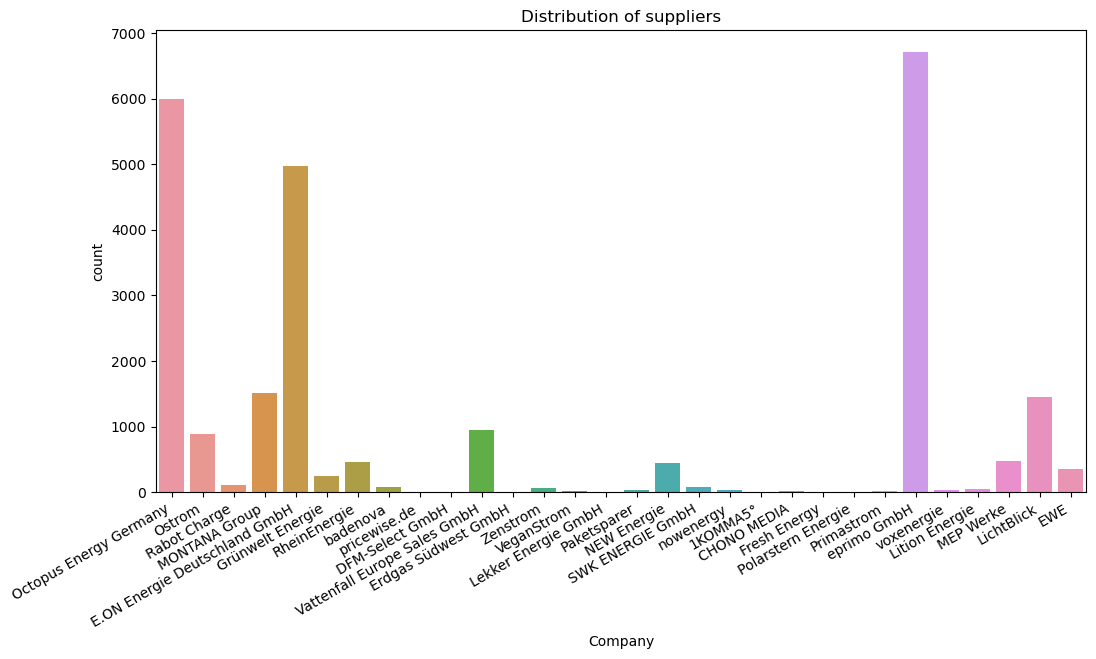

In [12]:
# distribution of energy suppliers
f, ax = plt.subplots(figsize = (12, 6))
plt.title("Distribution of suppliers")
sns.countplot(x='Company', data=star2)
plt.xticks(rotation= 30, ha='right');

# Key word analysis for E.ON

To identify the most common topics, we are looking for key words in the headlines, comments and supplier responses. As an example, we will look first at one supplier only: E.ON Energie Deutschland GmbH.

Links:

https://machinelearningmastery.com/gentle-introduction-bag-words-model/

https://medium.com/@tzjy/natural-language-processing-bag-of-words-python-code-included-ede3cfe979d2

https://towardsdatascience.com/beyond-the-cloud-4-visualizations-to-use-instead-of-word-cloud-960dd516f215

https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html


The following approach for all texts: 
 - Check duplicates for each feature
 - Create a string containing the concatenation of all entries in the text column of the data set, inserting thereby a space between each line.
 - Convert the text to lowercase characters only
 - Clean the the string for special characters, numbers etc.
 - Tokenize the content of the string.
 - Initiate a stop words file for German language, adding in iterations to the content
 - Filter the word token list with the stop words file
 - Count the number of occurrence for each word
 - Create a data frame for visualization

To improve processing, some steps have been included into a function.

With different visualizations, the most common words will be aggregated and for meaningful keywords investigated.

### E.ON data

In [17]:
# choose only supplier E.ON
answers_eon = star2.loc[star2['Company'] == 'E.ON Energie Deutschland GmbH']

In [18]:
answers_eon.shape

(4965, 20)

In [19]:
answers_eon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4965 entries, 12156 to 18374
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stars           4965 non-null   int64  
 1   Headline        4965 non-null   object 
 2   Comment         4965 non-null   object 
 3   Answer          4965 non-null   object 
 4   DoE.day         4965 non-null   int64  
 5   DoE.month       4965 non-null   int64  
 6   DoE.year        4965 non-null   int64  
 7   DoP.day         4965 non-null   int64  
 8   DoP.month       4965 non-null   int64  
 9   DoP.year        4965 non-null   int64  
 10  DoA.day         4965 non-null   float64
 11  DoA.month       4965 non-null   float64
 12  DoA.year        4965 non-null   float64
 13  Comment_TF      4965 non-null   int64  
 14  Answer_TF       4965 non-null   int64  
 15  Company         4965 non-null   object 
 16  Words_Headline  4965 non-null   int64  
 17  Words_Comment   4965 non-null   f

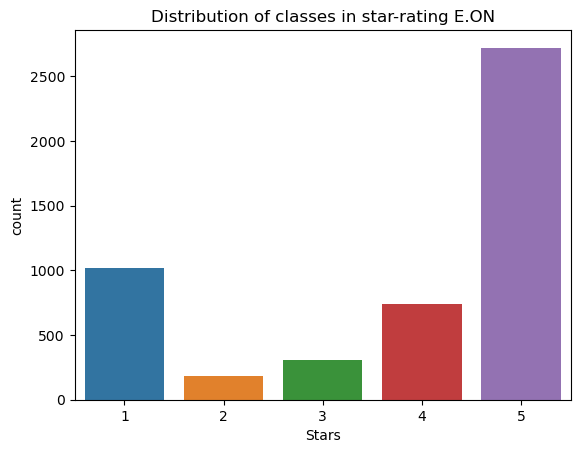

In [20]:
#plot distribution
plt.title("Distribution of classes in star-rating E.ON")
sns.countplot(x='Stars', data=answers_eon);

In [21]:
# remove unnecessary columns so that we only have the text columns and the star rating
all_texte_eon = answers_eon.drop(['DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
all_texte_eon.head()


Stars                                           Headline  \
12156      5                                Korrekte Wiedergabe   
12157      5           Leichte Eingabe der Daten und schneller…   
12158      3                Service ist anscheinend überfordert   
12159      5  Wenn das so weitergeht mit e-on, bleibe ich se...   
12160      5             eigene Zählerablesung mehrmals im Jahr   

                                                 Comment  \
12156  Korrekte Auflistung des Zählerstandes und Verb...   
12157  Leichte Eingabe der Daten und schneller Wechse...   
12158  Hallo,Leider muss man sich mehr Fach mit dem S...   
12159  Ich bin rundum zufrieden mit e-on. Umzug mit Ü...   
12160  Alles korrekt.  Allerdings erscheint bei uns n...   

                                                  Answer  
12156   Lieber Trustpilot Nutzer, wir freuen uns sehr...  
12157   Lieber Trustpilot Nutzer, wir freuen uns sehr...  
12158   Lieber Trustpilot Nutzer,  vielen Dank für de...  
12159   Lieber Trustpilot Nutzer, wir freuen uns sehr...  
12160   Lieber Trustpilot Nutzer, wir freuen uns sehr...

In [22]:
#check for duplicates
print("Number of duplicates: ", all_texte_eon.duplicated().sum()) # There are duplicates

Number of duplicates:  2


In [23]:
# drop duplicates
all_texte_eon.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
print("Number of duplicates: ", all_texte_eon.duplicated().sum()) ## no more duplicates

Number of duplicates:  0


#### E.ON Stop words

In [25]:
#import
import nltk
from nltk.corpus import stopwords

#set stop_words to German
stop_words = set(stopwords.words('german'))

In [26]:
print(stop_words)

{'euch', 'bin', 'an', 'dort', 'hatte', 'im', 'jenem', 'meines', 'während', 'musste', 'anderen', 'manche', 'keinem', 'aber', 'viel', 'weil', 'einiger', 'ihre', 'etwas', 'einem', 'nicht', 'sie', 'ihn', 'solche', 'welchem', 'eine', 'nichts', 'gegen', 'unter', 'dieselben', 'hier', 'meine', 'keinen', 'eines', 'sein', 'für', 'deinen', 'ihren', 'ohne', 'vom', 'bist', 'einige', 'einer', 'du', 'über', 'dich', 'diesen', 'kann', 'seinem', 'solchen', 'anderem', 'solchem', 'anderm', 'werden', 'hinter', 'einmal', 'ein', 'man', 'den', 'eures', 'oder', 'dasselbe', 'manches', 'indem', 'unserem', 'hat', 'ob', 'vor', 'würden', 'damit', 'manchen', 'soll', 'wenn', 'will', 'mir', 'hab', 'eurer', 'würde', 'zur', 'andere', 'derer', 'jeden', 'unsere', 'alle', 'auf', 'mich', 'anderr', 'er', 'aller', 'von', 'ihres', 'euer', 'seine', 'ihm', 'mein', 'meinen', 'nach', 'jener', 'nun', 'dem', 'seiner', 'eure', 'zwischen', 'wieder', 'welches', 'sehr', 'anderer', 'jenes', 'dein', 'jeder', 'selbst', 'der', 'keiner', 'so

In [27]:
# Add stop words 
stop_words.update(["eon", "gas", "'", '"', " ", "", "davon", "eine", "unn", "to", "erdgas", "vs", "via", "unter", "sogar", " eon", " gas", "aaa", "wäre", "und", "kommt", "götz", "kann", "dieser", "bla", "euch", "nein", "wurde", "per", "aber", "schon", "mal", "mehr", "seit"]) 

## Headlines

### Prep & check

In [30]:
# remove unnecessary columns so that we only have the headline column
all_answers_eon = answers_eon.drop(['Stars', 'Comment', 'Answer', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
all_answers_eon.head()

#check for duplicates
print("Number of duplicates: ", all_answers_eon.duplicated().sum()) ## There are duplicates

Number of duplicates:  559


In [31]:
# drop duplicates
all_answers_eon.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
print("Number of duplicates: ", all_answers_eon.duplicated().sum()) ## no more duplicates

Number of duplicates:  0


In [32]:
#create string for all headlines, insert a space between each line
headlines = ""
for value in all_answers_eon.Headline:
    headlines += value + ' '

In [33]:
#check 
headlines[:500]

'Korrekte Wiedergabe Leichte Eingabe der Daten und schneller… Service ist anscheinend überfordert Wenn das so weitergeht mit e-on, bleibe ich sehr gerne. eigene Zählerablesung mehrmals im Jahr Meine Erfahrung Kundenveraergerung Eine Woche lang war es spannend aber dann hat der Wechsel prima geklappt! Einfach und übersichtlich! Ich warte seit rund einer Woche auf die… Unterirdisch schlecht Ich hab Zahlungserinnerung gekriegt für… Nie wieder eon So einen super Versorgerwechsel hab ich… Abschlag kon'

In [34]:
#Lowercase all entries and replace German special chars

headlines_eon = headlines.casefold() # also transforms ß into ss

# remove special chars: maps every character in list of special characters to a "", then calls translate() on the string
headlines_eon = headlines_eon.translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,…./<>?\|'`~-=_+"})

#replace all non-letter chars except German specific
import re
headlines_eon = re.sub('[^a-zäöü \n\.]', '', headlines_eon)

#check 
headlines_eon[:500]

'korrekte wiedergabe leichte eingabe der daten und schneller service ist anscheinend überfordert wenn das so weitergeht mit eon bleibe ich sehr gerne eigene zählerablesung mehrmals im jahr meine erfahrung kundenveraergerung eine woche lang war es spannend aber dann hat der wechsel prima geklappt einfach und übersichtlich ich warte seit rund einer woche auf die unterirdisch schlecht ich hab zahlungserinnerung gekriegt für nie wieder eon so einen super versorgerwechsel hab ich abschlag konnte ich n'

In [35]:
#import
from nltk.tokenize import TweetTokenizer 

#instantiate
tokenizer = TweetTokenizer() 

#apply to headlines and calculate tokens
tokens = tokenizer.tokenize(headlines_eon) 

In [36]:
#total number of words
print("Total number of words in headlines: ", len(tokens))

Total number of words in headlines:  18707


In [37]:
#total number of different words
unique_tokens = []
for word in tokens:
    if word not in unique_tokens:
        unique_tokens.append(word)

print("Total number of different words in headlines: ", len(unique_tokens))

Total number of different words in headlines:  3137


For the stop_words list additional entries have been created over iterations, to improve the output in regard of meaningful key words.

In [39]:
#define filtering function
def stop_words_filtering(words):
    tokens = [] #tokens list
    for word in words:  #iterate through words list
        #add only words to tokens list, if not in stop_words
        if word not in stop_words:
            tokens.append(word) 
    return tokens

In [40]:
#apply new function stop_words_filtering on tokens list
tokens = stop_words_filtering(tokens)

In [41]:
#check 
tokens[:20]


['korrekte',
 'wiedergabe',
 'leichte',
 'eingabe',
 'daten',
 'schneller',
 'service',
 'anscheinend',
 'überfordert',
 'weitergeht',
 'bleibe',
 'gerne',
 'eigene',
 'zählerablesung',
 'mehrmals',
 'jahr',
 'erfahrung',
 'kundenveraergerung',
 'woche',
 'lang']

In [42]:
# total number of words
len(tokens) 
print("Total number of words after applying stop_words: ", len(tokens))

Total number of words after applying stop_words:  10440


### Visualization with Word cloud

In [44]:
#Import the bag of words package
from sklearn.feature_extraction.text import CountVectorizer

# Create a vectorizer
vectorizer = CountVectorizer()

# Apply Bag of words to the tokens variable
vectorizer.fit_transform(tokens)

# Recovery of tokens
tokenized = vectorizer.vocabulary_


In [45]:
#pip install wordcloud

In [46]:
from wordcloud import WordCloud

#set wordcloud
wc = WordCloud(background_color= 'black', #background color
               max_words= 1000, #maximum number of words to display
               max_font_size= 70, #max font size
               random_state= 42,
               collocations=False, #avoid duplicated words
               colormap='Set2' #colormap from matplotlib
               #mask=mask #mask img needs to be instantiated
              )

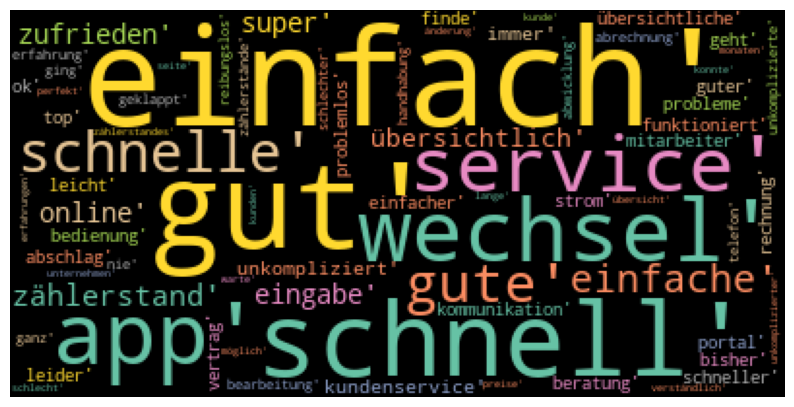

In [47]:
import matplotlib.pyplot as plt

# Generate and display the word cloud
plt.figure(figsize= (10,10)) # Initialization of a figure
wc.generate(str(tokens)) # "Calculation" of the wordcloud from text
plt.imshow(wc) # Display
plt.axis("off")
plt.show()

#### Positive headlines for E.ON; Function get_clean_wordslist

To compare positive and negative feedback, let us have a look at 1 and 5 star ratings separately.

In [50]:
## select data
pos_answers_eon = answers_eon.loc[answers_eon['Stars'] == 5]
pos_answers_eon.shape

(2721, 20)

In [51]:
# remove unnecessary columns so that we only have the headline column
pos_answers_eon = answers_eon.drop(['Stars', 'Comment', 'Answer', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
pos_answers_eon.head()

#check for duplicates
print("Number of duplicates: ", pos_answers_eon.duplicated().sum()) ## There are duplicates

Number of duplicates:  559


In [52]:
# drop duplicates
pos_answers_eon.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
print("Number of duplicates: ", pos_answers_eon.duplicated().sum()) ## no more duplicates

Number of duplicates:  0


In [53]:
#create string for all headlines, insert a space between each line
headlines_pos = ""
for value in pos_answers_eon.Headline:
    headlines_pos += value + ' '

In [54]:
#check headlines_pos
headlines_pos[:500]

'Korrekte Wiedergabe Leichte Eingabe der Daten und schneller… Service ist anscheinend überfordert Wenn das so weitergeht mit e-on, bleibe ich sehr gerne. eigene Zählerablesung mehrmals im Jahr Meine Erfahrung Kundenveraergerung Eine Woche lang war es spannend aber dann hat der Wechsel prima geklappt! Einfach und übersichtlich! Ich warte seit rund einer Woche auf die… Unterirdisch schlecht Ich hab Zahlungserinnerung gekriegt für… Nie wieder eon So einen super Versorgerwechsel hab ich… Abschlag kon'

In [55]:
# define stop words (see above)
# create function to get clean token list
def get_clean_wordslist(input_text, stopwords):
    """
    This function
    - Converts the text to lowercase characters only
    - Cleans a text of special characters, numbers etc. an
    - Tokenizes the content of the string.
    - Filters the word token list with the stop words file specifieds

    Parameters:
    -----------
    input_text: the text/string to tokenize.
    stopwords: the stop_words file to filter the text 

    Returns:
    --------
    A cleaned text file with words from input text, filtered by specified stopwords list.
    """
    # lowercase all entries and replace German special chars, also transforms ß into ss
    input_text = input_text.casefold()

    # remove special chars: maps every character in list of special characters to a "", then calls translate() on the string
    input_text = input_text.translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,…./<>?\|'`~-=_+"})
    import re
    input_text = re.sub('[^a-zäöü \n\.]', '', input_text)

    # split text into words and store in tokens
    from nltk.tokenize import TweetTokenizer 
    tokenizer = TweetTokenizer() 
    tokens = tokenizer.tokenize(input_text) 
    
    # remove stop words
    words_list = []
    for word in tokens:  
        #add only words to words_list, if not in stop_words
        if word not in stopwords:
            words_list.append(word)
    
    return words_list

In [56]:
# apply get_clean_wordslist
eon_headlines_pos = get_clean_wordslist(headlines_pos, stop_words)
#check 
eon_headlines_pos[:20]

['korrekte',
 'wiedergabe',
 'leichte',
 'eingabe',
 'daten',
 'schneller',
 'service',
 'anscheinend',
 'überfordert',
 'weitergeht',
 'bleibe',
 'gerne',
 'eigene',
 'zählerablesung',
 'mehrmals',
 'jahr',
 'erfahrung',
 'kundenveraergerung',
 'woche',
 'lang']

In [57]:
# number of lists entries
len(eon_headlines_pos)

10440

In [58]:
#import image
from PIL import Image
import numpy as np

mask = np.array(Image.open("daumen-hoch.jpg"))

In [59]:
from wordcloud import WordCloud


#set wordcloud
wc = WordCloud(background_color= 'white', #background color
               max_words= 1000, #maximum number of words to display
               max_font_size= 70, #max font size
               random_state= 42,
               collocations=False,
               colormap='summer',
               mask=mask #mask img needs to be instantiated
              )

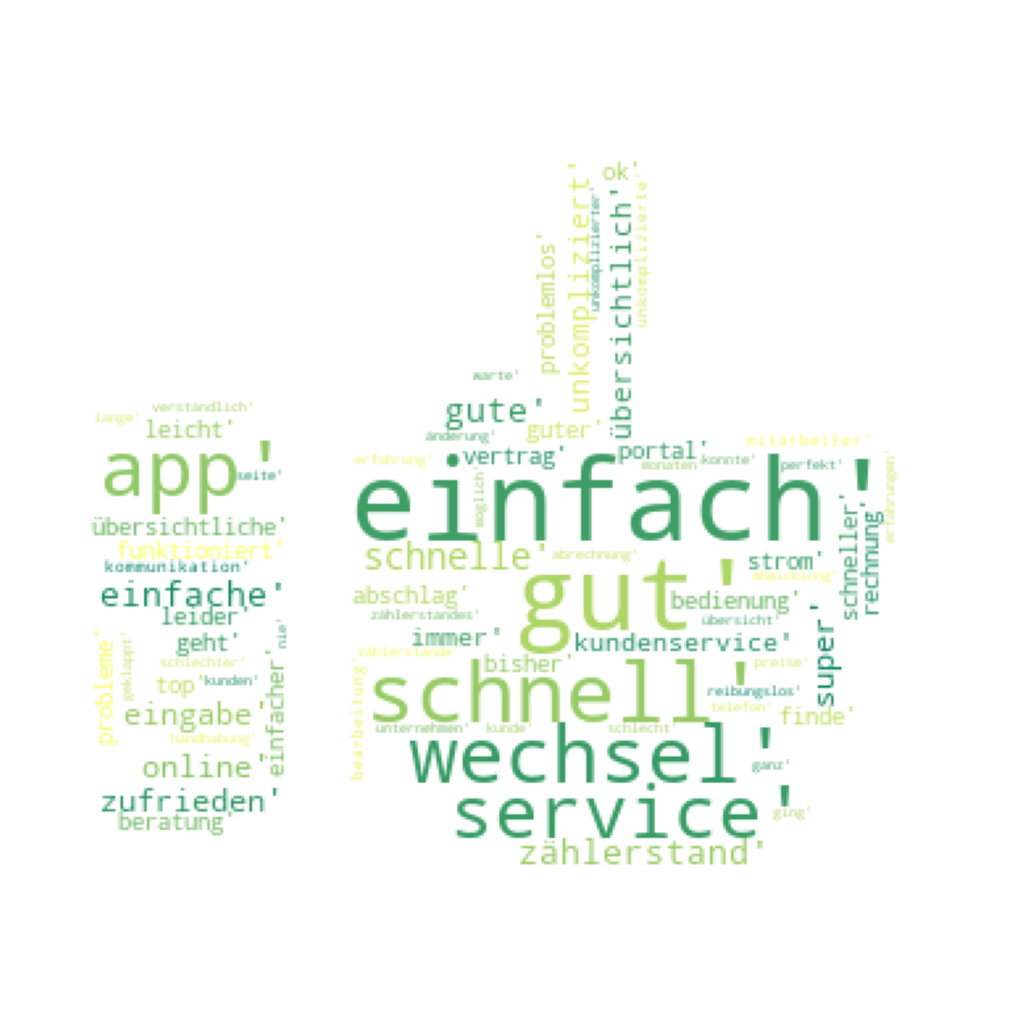

In [60]:
import matplotlib.pyplot as plt

# Generate and display the word cloud
plt.figure(figsize= (10,10)) # Initialization of a figure
wc.generate(str(eon_headlines_pos)) # "Calculation" of the wordcloud from text
plt.imshow(wc) # Display
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

#### Negative headlines for E.ON

In [62]:
## select data
neg_answers_eon = answers_eon.loc[answers_eon['Stars'] == 1]
neg_answers_eon.shape

(1015, 20)

In [63]:
# remove unnecessary columns
neg_answers_eon = neg_answers_eon.drop(['Stars', 'Comment', 'Answer', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
neg_answers_eon.head()

#check for duplicates
print("Number of duplicates: ", neg_answers_eon.duplicated().sum())

Number of duplicates:  18


In [64]:
# drop duplicates
neg_answers_eon.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
print("Number of duplicates: ", neg_answers_eon.duplicated().sum()) ## no more duplicates

Number of duplicates:  0


In [65]:
#create string for all headlines, insert a space between each line
headlines_neg = ""
for value in neg_answers_eon.Headline:
    headlines_neg += value + ' '

In [66]:
#check headlines_neg
headlines_neg[:500]

'Unterirdisch schlecht Ich hab Zahlungserinnerung gekriegt für… Nie wieder eon Schreckliche Dienstleistungen Chaotisch Kontakt schlecht bis gar keinen Einer der schlimmsten Stromanbieter… Nach 8 Monaten immer noch keine Abrechnung für 2022 Verttragsübertragung von den Lechwerken… Leider kann man eine 0 Sterne vergeben Ewig (über 20 Min) in der Warteschleife… Ich warte bereits 9 Monate auf die… Kundenservice? Verdummung der Verbraucher!? Wir haben eine Vertragsübernahme… Kundenservice ist komplett'

In [67]:
# apply get_clean_wordslist
eon_headlines_neg = get_clean_wordslist(headlines_neg, stop_words)
#check 
eon_headlines_neg[:20]

['unterirdisch',
 'schlecht',
 'zahlungserinnerung',
 'gekriegt',
 'nie',
 'schreckliche',
 'dienstleistungen',
 'chaotisch',
 'kontakt',
 'schlecht',
 'gar',
 'schlimmsten',
 'stromanbieter',
 'monaten',
 'immer',
 'abrechnung',
 'verttragsübertragung',
 'lechwerken',
 'leider',
 'sterne']

In [68]:
# number of lists entries
len(eon_headlines_neg)

2407

In [69]:
#import image
from PIL import Image
import numpy as np

mask2 = np.array(Image.open("daumen-runter.jpg"))

In [70]:
from wordcloud import WordCloud

#set wordcloud
wc = WordCloud(background_color= "white", #background color
               max_words= 1000, #maximum number of words to display
               max_font_size= 70, #max font size
               random_state= 42,
               collocations=False,
               colormap='gist_heat',
               mask=mask2 #mask img needs to be instantiated
              )

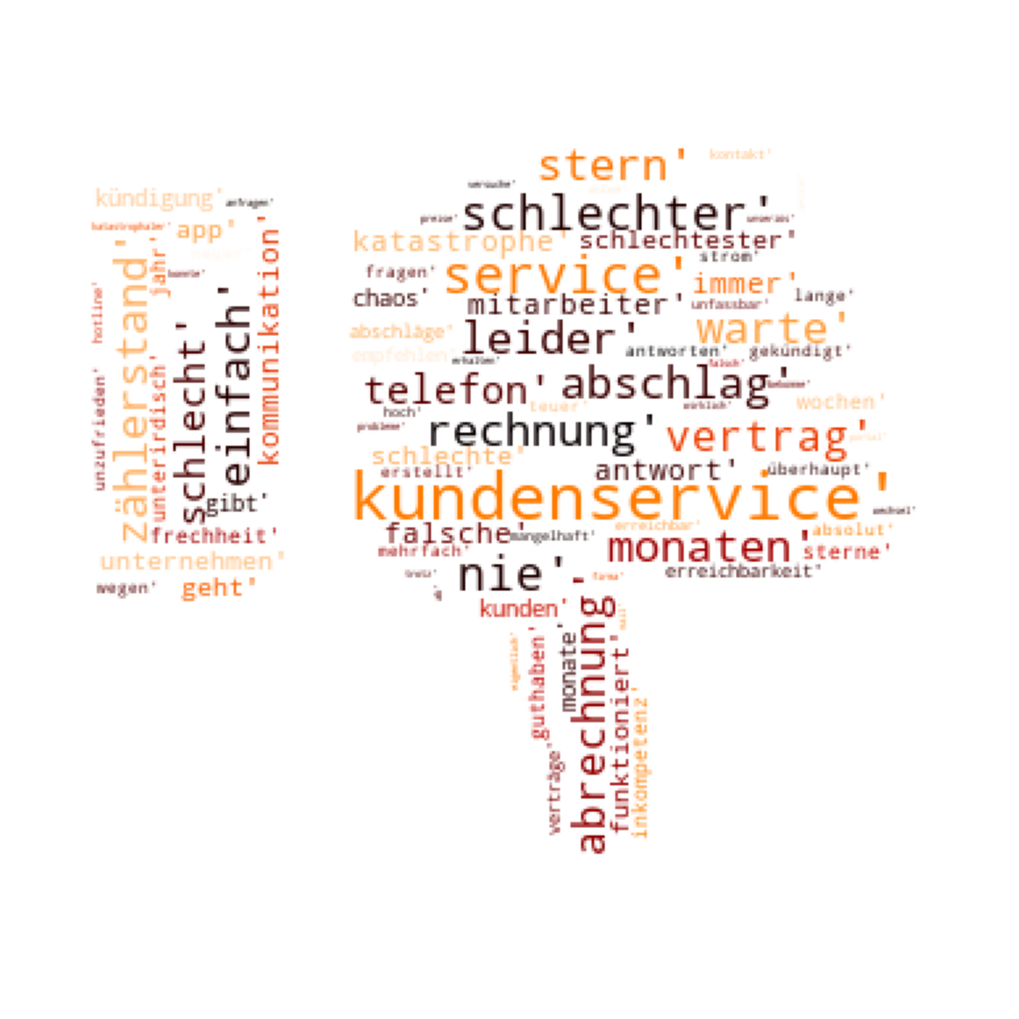

In [71]:
import matplotlib.pyplot as plt

# Generate and display the word cloud
plt.figure(figsize= (10,10)) # Initialization of a figure
wc.generate(str(eon_headlines_neg)) # "Calculation" of the wordcloud from text
plt.imshow(wc) # Display
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

### Bar charts

As we can see, while the display of the words most often mentioned is visually attractive, more information can be gained by attributing words with a count statistics.

While a simple bar chart has limitations on displaying text due to having only a small text area. By creating multiple bar charts and combining them, we can improve legibility and save space.

#### Function get_wordcount_df, color palette dictionary

In [75]:
# define stop words (see above)
# create function to get word count into a data frame
def get_wordcount_df(input_text, stopwords):
    """
    This function
    - Converts the text to lowercase characters only
    - Cleans a text of special characters, numbers etc. an
    - Tokenizes the content of the string.
    - Filters the word token list with the stop words file specifieds
    - Counts the number of occurrence for each word
    - Creates a data frame listing every word with its number of occurrences in the file
    - Sorts the content by word count in descending order 

    Parameters:
    -----------
    input_text: the text/string to tokenize.
    stopwords: the stop_words file to filter the text 

    Returns:
    --------
    A data frame with words from input text, cleaned ans filtered by specified stopwords list, with each word and its number of occurences in the input_text sorted.
    """
    
    # lowercase all entries and replace German special chars, also transforms ß into ss
    input_text = input_text.casefold()

    # remove special chars: maps every character in list of special characters to a "", then calls translate() on the string
    input_text = input_text.translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,…./<>?\|'`~-=_+"})
    import re
    input_text = re.sub('[^a-zäöü \n\.]', '', input_text)

    # split text into words and store in tokens
    from nltk.tokenize import TweetTokenizer 
    tokenizer = TweetTokenizer() 
    tokens = tokenizer.tokenize(input_text) 
    
    # remove stop words
    words_list = []
    for word in tokens:  
        #add only words to words_list, if not in stop_words
        if word not in stopwords:
            words_list.append(word)

    # create unique_words list
    unique_words = []
    for word in words_list:
        # add only list if unique
        if word not in unique_words:
            unique_words.append(word)
            
    # count each word
    count_words = [words_list.count(i) for i in unique_words]

    #create data frame
    df = pd.DataFrame(zip(unique_words, count_words), columns=['words','count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [76]:
#create function to get a color dictionary
def get_colordict(palette, number, start):
    """
    This function creates a color dictionary to support visualizations for listed items.
    
    Parameters:
    -----------
    palette: name of matplotlib predefined color palette
    number: number of color fields needed
    start: number where to start in the palette

    Returns:
    --------
    a color dictionary
    """
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

#### Positive feedback

In [78]:
## Create Data Frame with most common words and word count
# input for positive feedback: headlines_pos
# stop_words = stop_words
# apply get_wordcount_df
df_pos_headline = get_wordcount_df(headlines_pos, stop_words)
df_pos_headline.head()

words  count
0  einfach    300
1      gut    230
2  schnell    161
3  wechsel    144
4      app    144

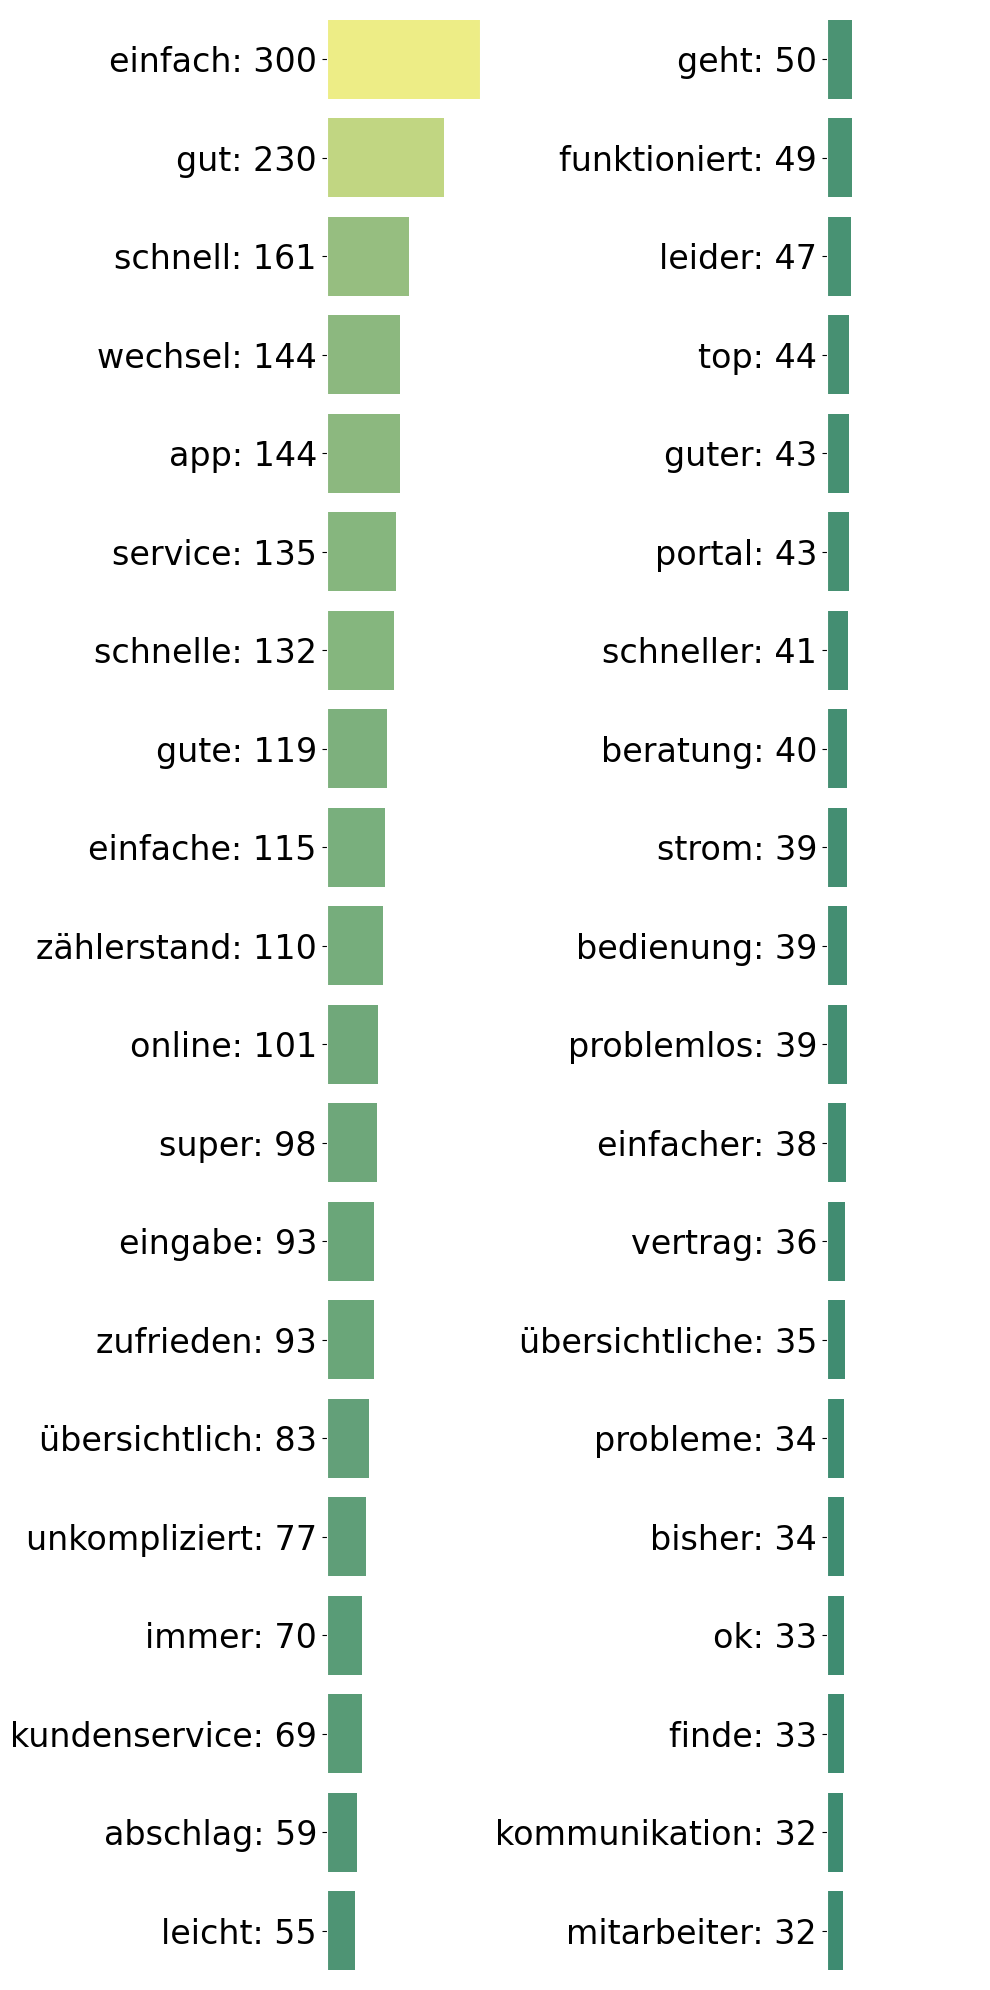

In [79]:
# Plot positive key words
# index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

# color palette definition
n = df_pos_headline['count'].max() ## add df!!
color_dict = get_colordict('summer', n, 1)

#plot
fig, axs = plt.subplots(1, 2, figsize=(10,20), facecolor='white', squeeze=False)
for col, idx in zip(range(0,2), index_list):
    df = df_pos_headline[idx[0]:idx[-1]]         ## add df!!
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+0.5)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=24)
    axs[0][col].set(xticklabels=[])
    axs[0][col].tick_params(bottom=False)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()
plt.show();

Interpretation:

Service related topics (kundenservice, service, beratung, bedienung, mitarbeiter), tariff change (wechsel), metering (Zählerstand) and invoice (Rechnung)are described as fast (schnell, schnelle, schneller), easy (einfach, einfache, unkompliziert, übersichtlich), working (funktioniert) and without problems (problemlos). In addition, digital topics like online, platform (portal) and App are highlighted as well. Overall a very positive feedback with good (gut, gute), top, ok , super and satisfied (zufrieden) ratings.

#### Negative feedback

In [82]:
# input for negative feedback: headlines_neg
# stop_words = stop_words
# apply get_wordcount_df
df_neg_headline = get_wordcount_df(headlines_neg, stop_words)
df_neg_headline.head()

words  count
0  kundenservice     52
1        service     31
2            nie     25
3     schlechter     25
4       rechnung     23

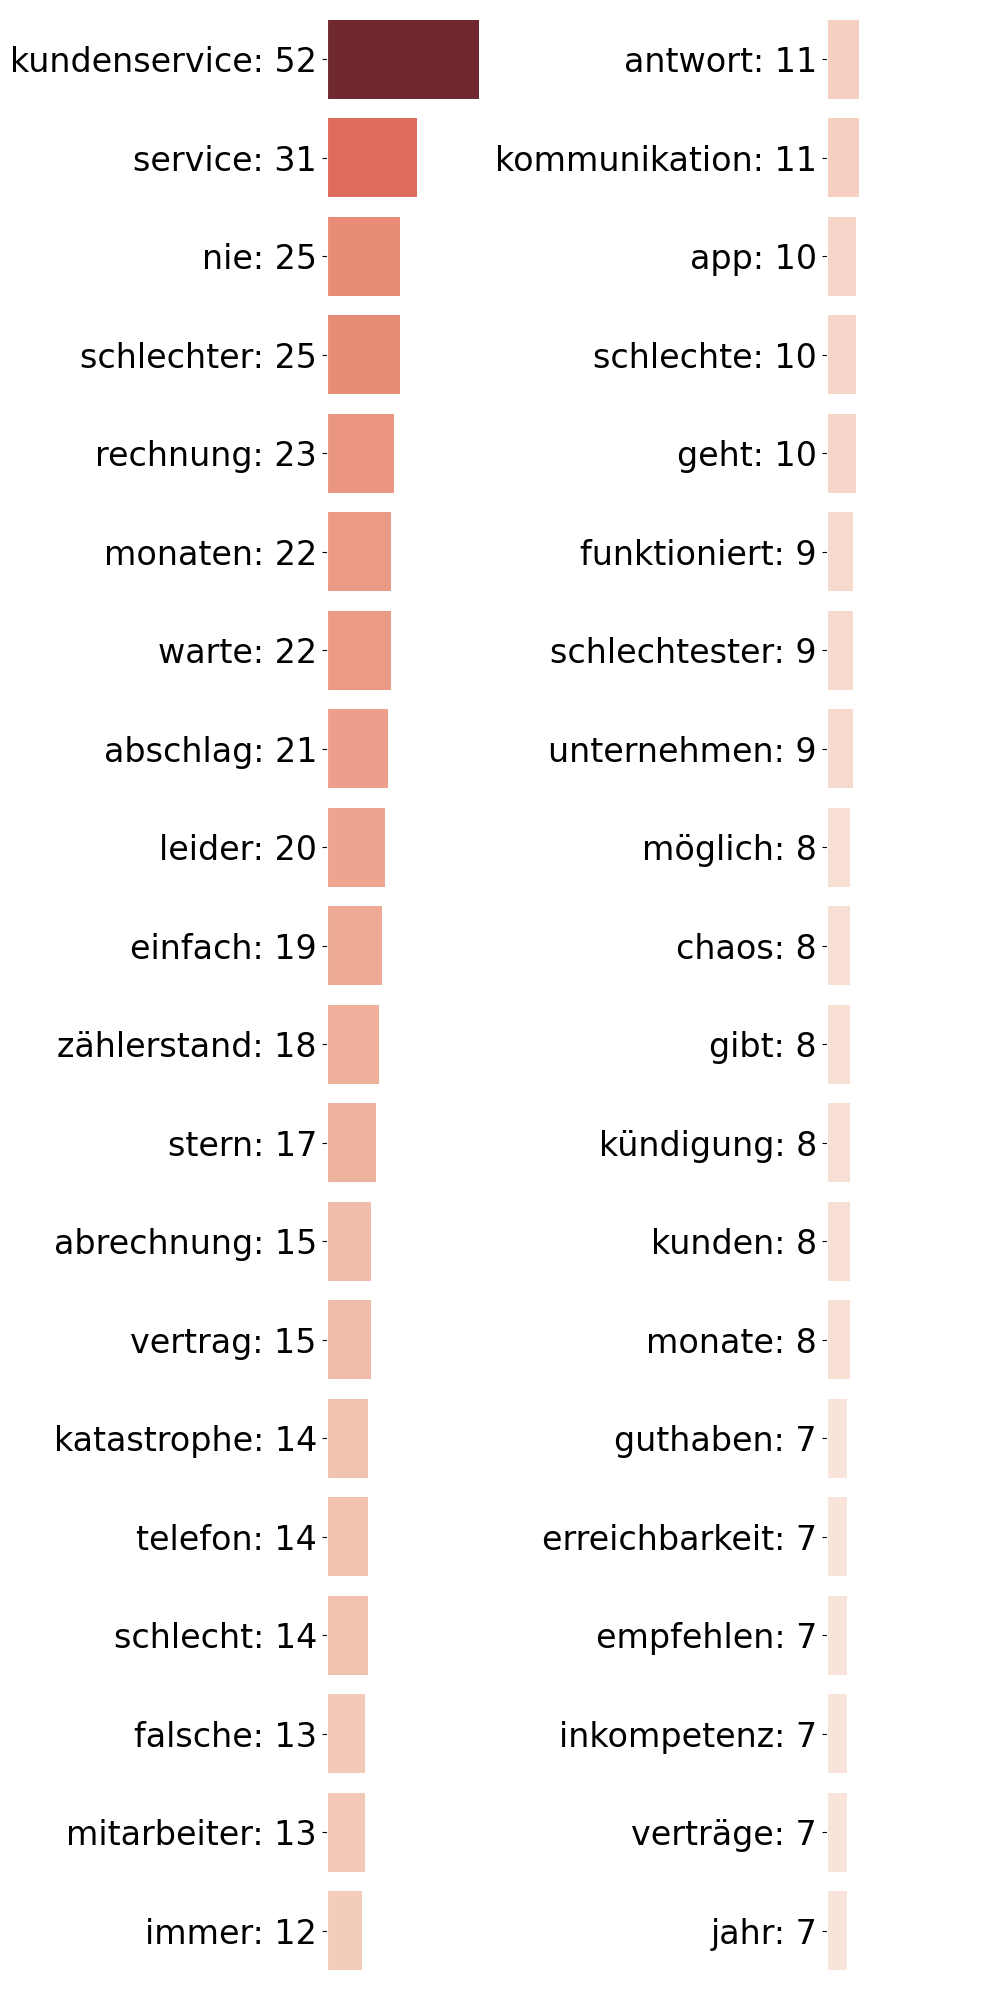

In [83]:
# Plot negative key words
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

# variable definition
n = df_neg_headline['count'].max()  #dataframe  # enter df!!
color_dict = get_colordict('Reds', n, 1) #color dicitionary from matplotlib

#plot
fig, axs = plt.subplots(1, 2, figsize=(10,20), facecolor='white', squeeze=False)
for col, idx in zip(range(0,2), index_list):
    df = df_neg_headline[idx[0]:idx[-1]]  # enter df!!
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+0.5)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=24)
    axs[0][col].set(xticklabels=[])
    axs[0][col].tick_params(bottom=False)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()    
plt.show();

Interpretation:

The comments mention invoice related topics (Rechnung, Abschlag, Abrechnung, Kündigung) with very negative terms like bad (schlecht) or catastrophe (Katastrophe) and nie (never). This might also refer to customer service (Kommunikation, Kundenservice, Service, Unternehmen, Mitarbeiter, Antwort, Telefon), contract (Vertrag) and metering (Zählerstand).

### Donut Chart 

As we have seen, some key words can be found in both positive and negative headlines, so let us have a look at the 30 most listed words.

In [87]:
## Create Data Frame with most common words and word count
# input for positive feedback: headlines_pos
# stop_words = stop_words
# apply get_wordcount_df
df_headline = get_wordcount_df(headlines, stop_words)
df_headline.head()

words  count
0  einfach    300
1      gut    230
2  schnell    161
3  wechsel    144
4      app    144

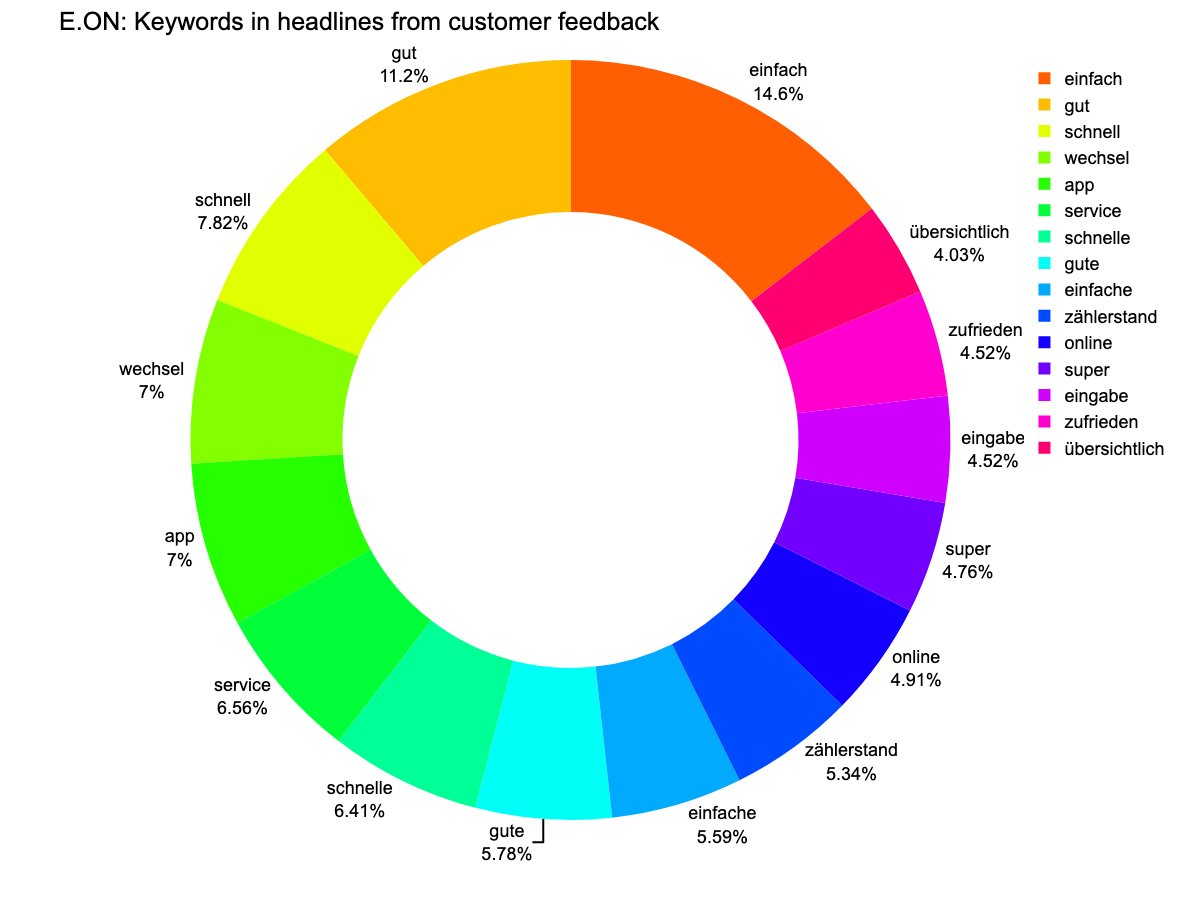

In [88]:
# donut chart
n = 15 # number of key words
pal = list(sns.color_palette(palette='hsv', n_colors=n).as_hex())

import plotly.express as px
fig = px.pie(df_headline[0:n], values='count', names='words',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 1200, height = 900,
                  title="E.ON: Keywords in headlines from customer feedback",
                  font=dict(
                      family="Arial",
                      size=18, 
                      color="black"
                  )
                )

fig.show()

## Customer Comments

### Donut Chart 30 most common words in Comments

In [91]:
# remove unnecessary columns so that we only have the headline column
all_comments_eon = answers_eon.drop(['Stars', 'Headline', 'Answer', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
all_comments_eon.head()

#check for duplicates
print("Number of duplicates: ", all_comments_eon.duplicated().sum()) ## There are duplicates

Number of duplicates:  14


In [92]:
# drop duplicates
all_comments_eon.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
print("Number of duplicates: ", all_comments_eon.duplicated().sum()) ## no more duplicates

Number of duplicates:  0


In [93]:
all_comments_eon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4951 entries, 12156 to 18374
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  4951 non-null   object
dtypes: object(1)
memory usage: 77.4+ KB


In [94]:
#create string for all comments, insert a space between each line
comments = ""
for value in all_comments_eon.Comment:
    comments += value + ' '

In [95]:
#check 
comments[:500]

'Korrekte Auflistung des Zählerstandes und Verbrauchs.Gute Übersicht vergangener Daten im Verlauf.Bei Abschlagszahlungen habe ich genügend Zeit zu überlegen, ob ich eine Änderung wünsche oder nicht.Allerdings bin ich nicht der große Computerfan. Ich warte die schriftliche Abrechnung ab und sehe dann weiter. Leichte Eingabe der Daten und schneller Wechsel des Abschlags! Leider lässt die Beantwortung von Fragen über das Kontaktformular zu Wünschen übrig! Teilweise habe ich auf Fragen vom Jahresanfa'

In [96]:
## Create Data Frame with most common words and word count
# apply get_wordcount_df
df_comments = get_wordcount_df(comments, stop_words)
df_comments.head()

words  count
0  einfach    847
1      gut    644
2  schnell    472
3    immer    467
4  vertrag    411

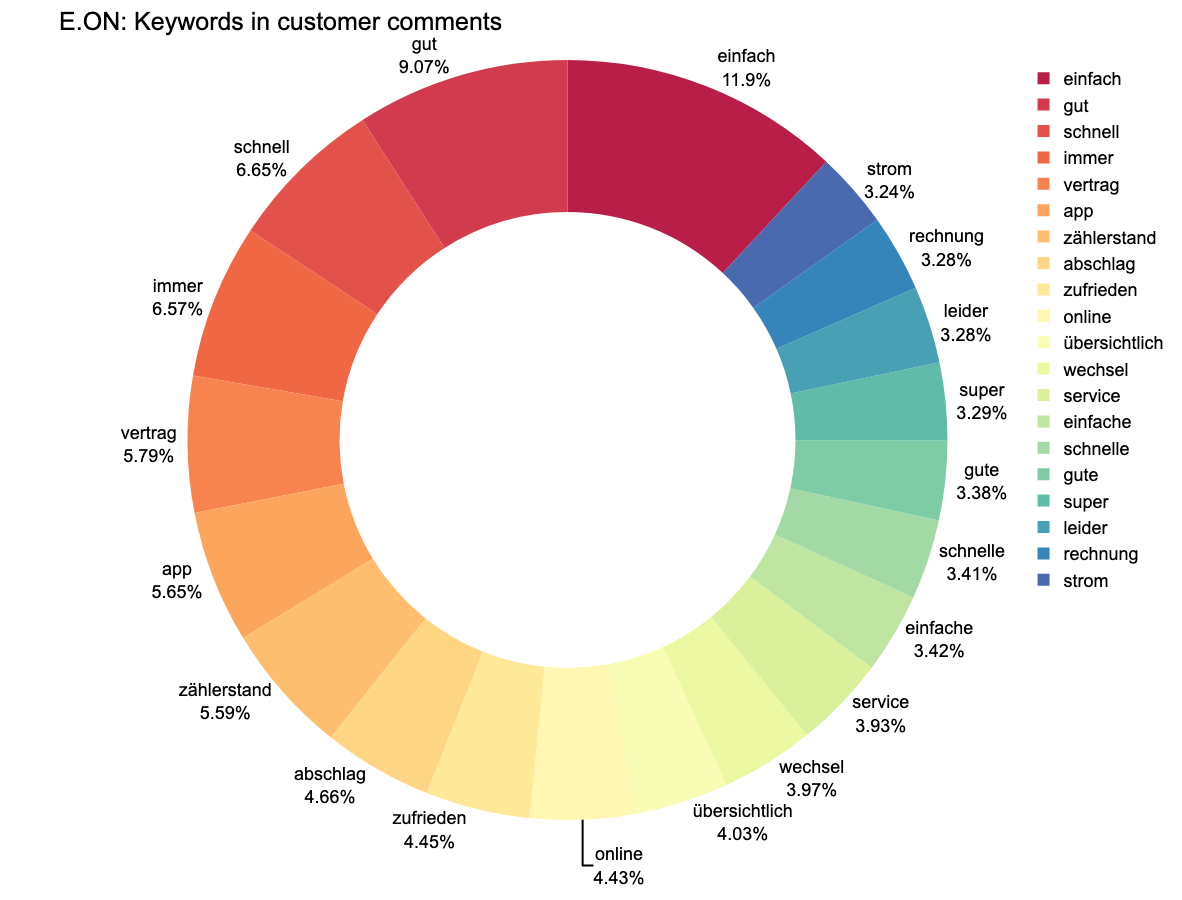

In [97]:
# donut chart
n = 20 # number of key words
pal = list(sns.color_palette(palette='Spectral', n_colors=n).as_hex())

import plotly.express as px
fig = px.pie(df_comments[0:n], values='count', names='words',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 1200, height = 900, 
                  title="E.ON: Keywords in customer comments",
                  font=dict(
                      family="Arial",
                      size=18, 
                      color="black"
                  )                 
                 )
fig.show()

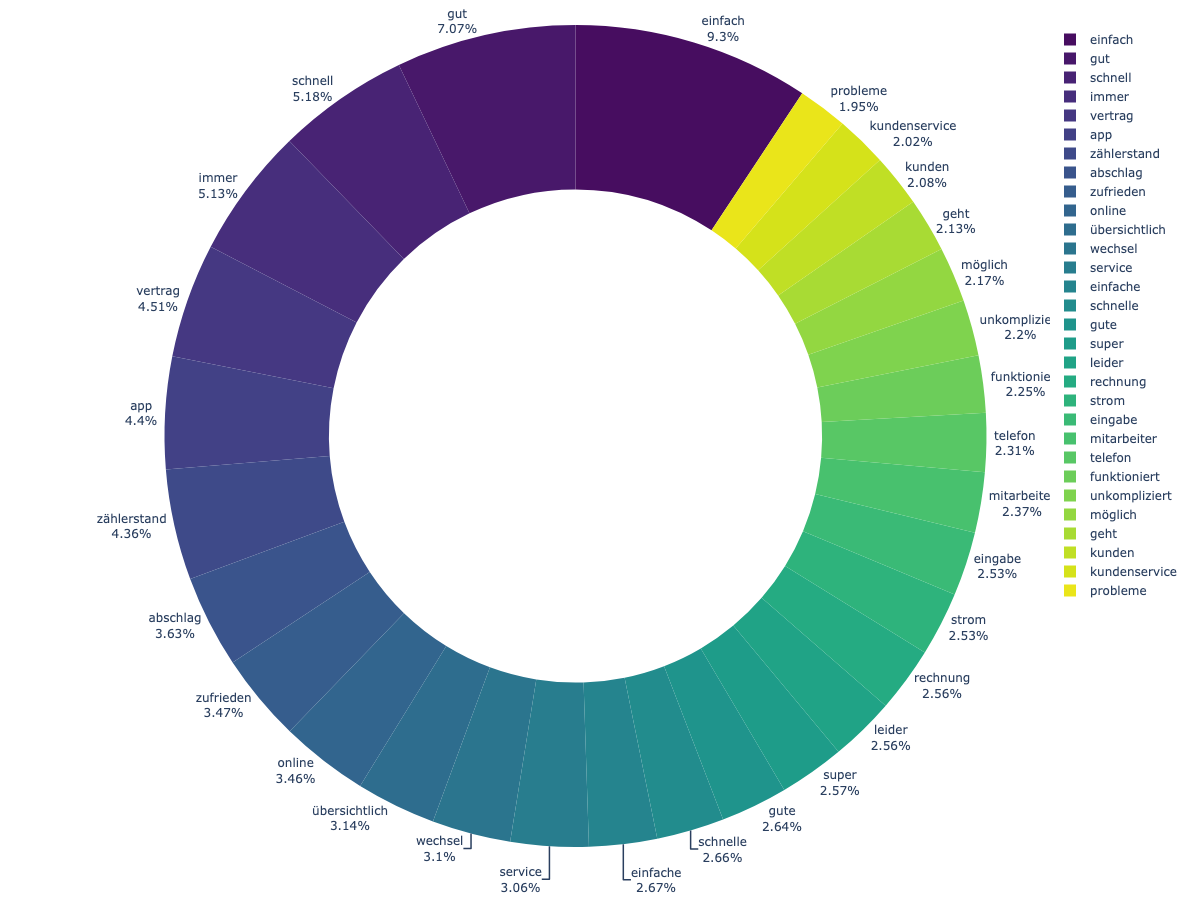

In [98]:
# donut chart
n = 30
pal = list(sns.color_palette(palette='viridis', n_colors=n).as_hex())

import plotly.express as px
fig = px.pie(df_comments[0:n], values='count', names='words',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 1200, height = 900,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [99]:
# apply get_clean_wordslist
eon_comments_all = get_clean_wordslist(comments, stop_words)
print("Total number of words after preprocessing: ",len(eon_comments_all))

Total number of words after preprocessing:  62852


### Positive Customer Comments

In [101]:
## select data = pos_answers_eon
pos_comments_eon = answers_eon.loc[answers_eon['Stars'] == 5]
pos_comments_eon.shape

(2721, 20)

In [102]:
# remove unnecessary columns so that we only have the headline column
pos_comments_eon = pos_comments_eon.drop(['Stars', 'Headline', 'Answer', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
pos_comments_eon.head()

#check for duplicates
print("Number of duplicates: ", pos_comments_eon.duplicated().sum()) ## There are duplicates

Number of duplicates:  12


In [103]:
# drop duplicates
pos_comments_eon.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
print("Number of duplicates: ", pos_comments_eon.duplicated().sum()) ## no more duplicates

Number of duplicates:  0


In [104]:
#create string for positive comments, insert a space between each line
pos_comments = ""
for value in pos_comments_eon.Comment:
    pos_comments += value + ' '

In [105]:
## Create Data Frame with most common words and word count
# input for positive feedback: headlines_pos
# stop_words = stop_words
# apply get_wordcount_df
df_pos_comments = get_wordcount_df(pos_comments, stop_words)
df_pos_comments.head()

words  count
0        einfach    566
1            gut    417
2        schnell    391
3  übersichtlich    243
4      zufrieden    235

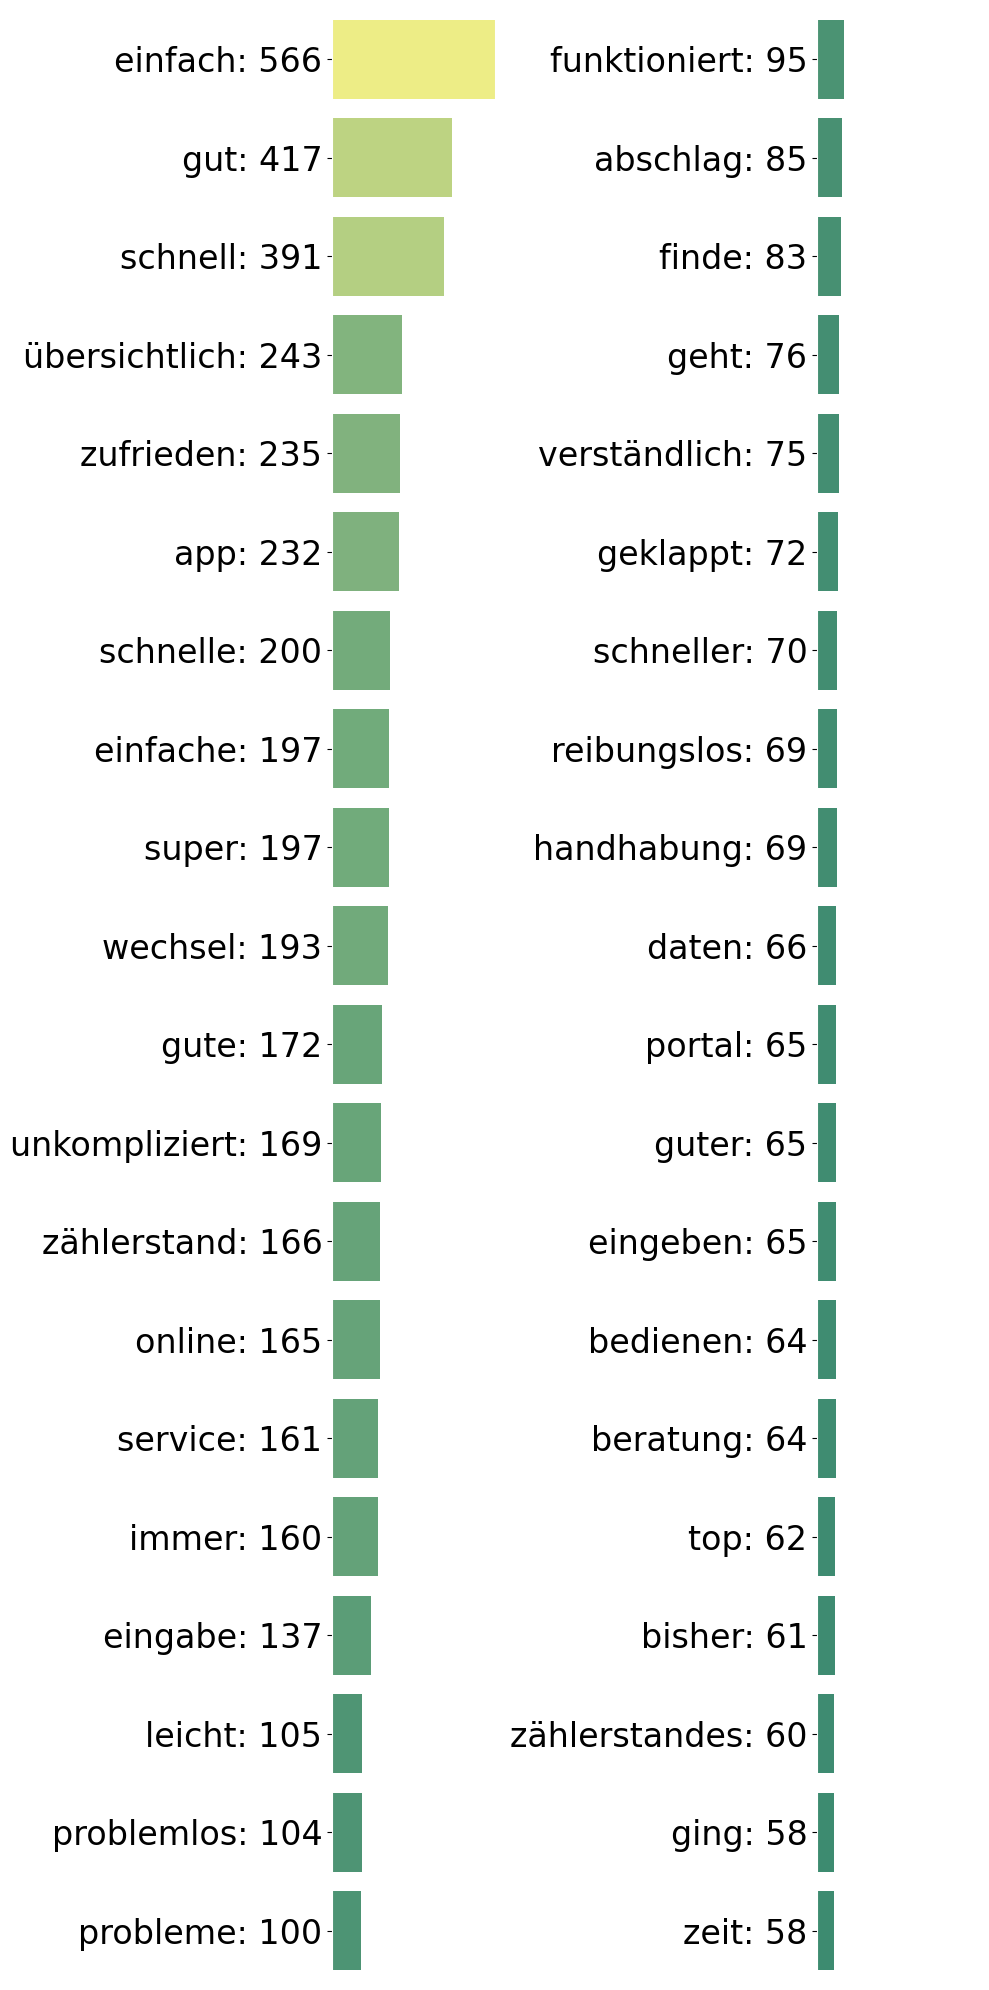

In [106]:
# Plot positive key words
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

# variable definition
n = df_pos_comments['count'].max()     # enter df!!
color_dict = get_colordict('summer', n, 1)

#plot
fig, axs = plt.subplots(1, 2, figsize=(10,20), facecolor='white', squeeze=False)
for col, idx in zip(range(0,2), index_list):
    df = df_pos_comments[idx[0]:idx[-1]]     # enter df!!
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+0.5)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=24)
    axs[0][col].set(xticklabels=[])
    axs[0][col].tick_params(bottom=False)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()

plt.show();

In [107]:
# apply get_clean_wordslist
eon_comments_pos = get_clean_wordslist(pos_comments, stop_words)
print("Total number of words after preprocessing: ",len(eon_comments_pos))

Total number of words after preprocessing:  18593


### Negative customer comments

In [109]:
## select data = neg_answers_eon
neg_comments_eon = answers_eon.loc[answers_eon['Stars'] == 1]
neg_comments_eon.shape

(1015, 20)

In [110]:
# remove unnecessary columns so that we only have the headline column
neg_comments_eon = neg_comments_eon.drop(['Stars', 'Headline', 'Answer', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
neg_comments_eon.head()

#check for duplicates
print("Number of duplicates: ", neg_comments_eon.duplicated().sum()) ## There are duplicates

Number of duplicates:  0


In [111]:
#create string for negative comments, insert a space between each line
neg_comments = ""
for value in neg_comments_eon.Comment:
    neg_comments += value + ' '

In [112]:
## Create Data Frame with most common words and word count
# input for negative feedback: neg_comments
# stop_words = stop_words
# apply get_wordcount_df
df_neg_comments = get_wordcount_df(neg_comments, stop_words)
df_neg_comments.head()

words  count
0        vertrag    281
1          immer    186
2       rechnung    154
3        einfach    153
4  kundenservice    129

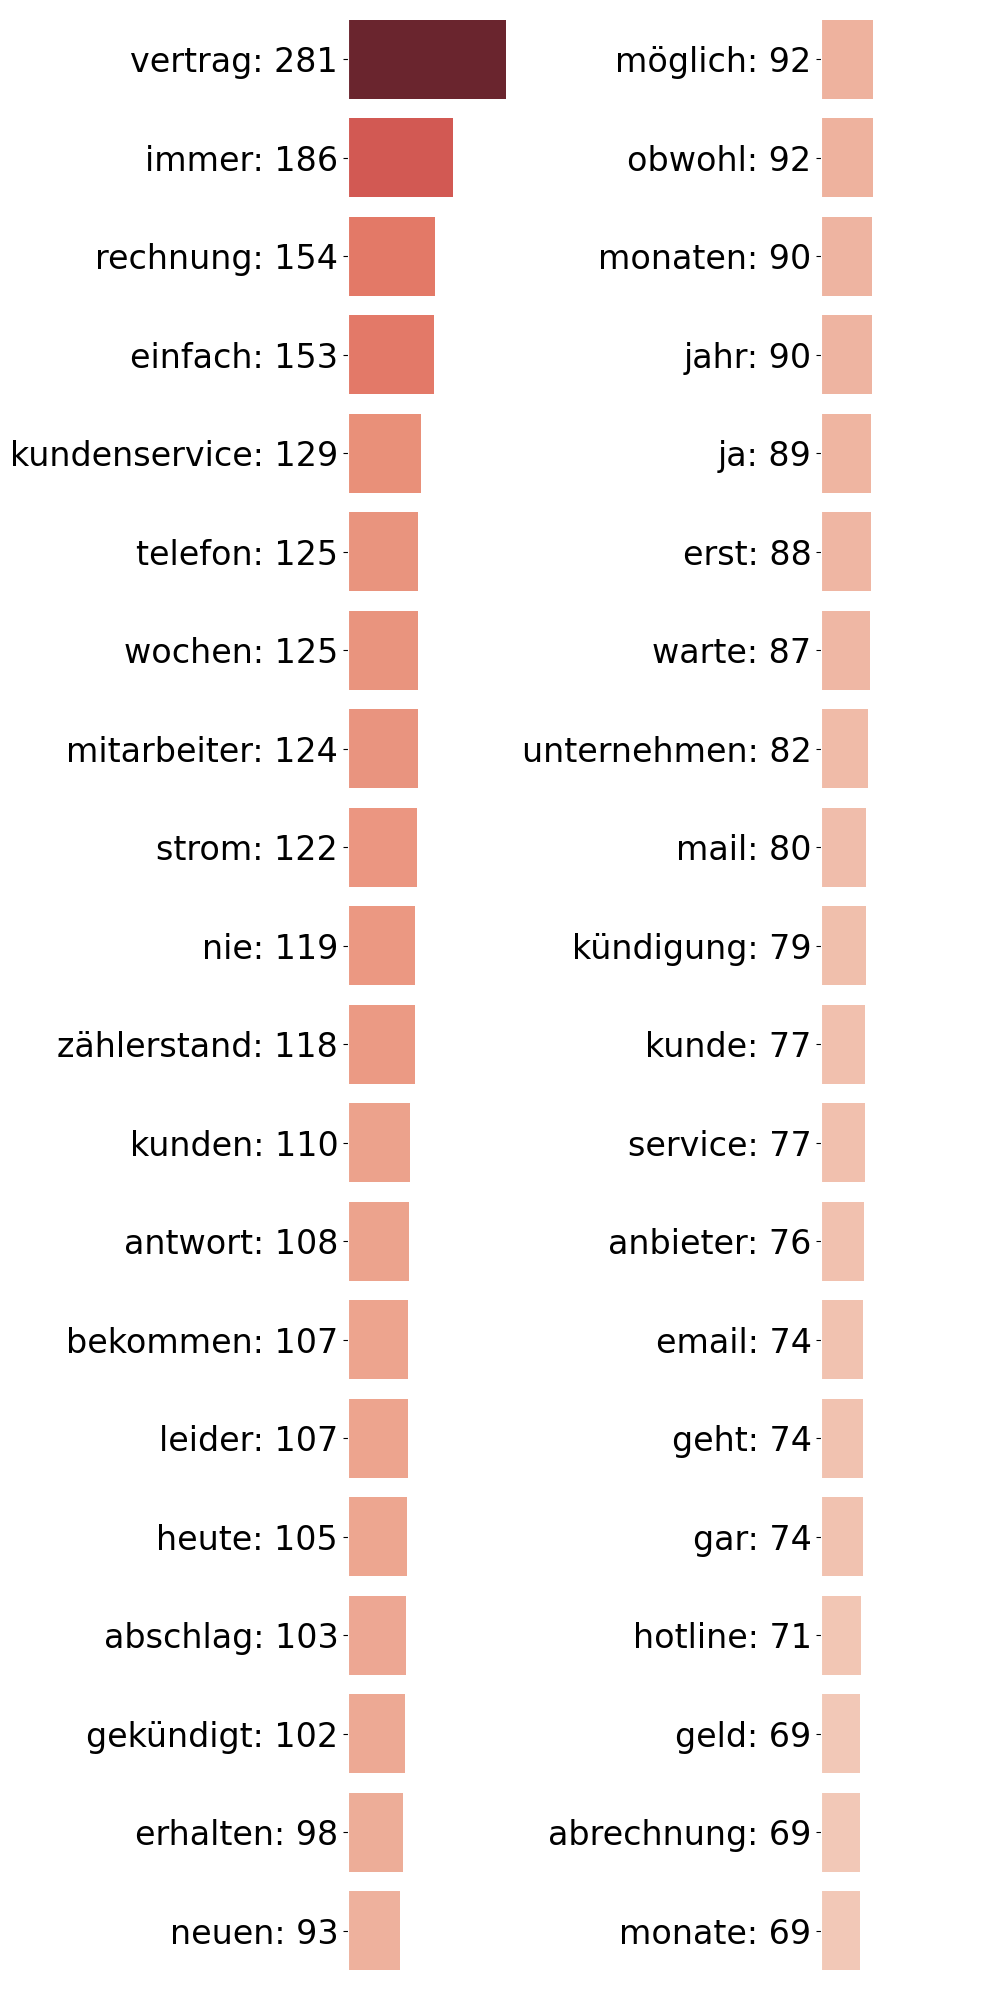

In [113]:
# Plot negative key words
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

# variable definition
n = df_neg_comments['count'].max() # enter df!!
color_dict = get_colordict('Reds', n, 1)

#plot
fig, axs = plt.subplots(1, 2, figsize=(10,20), facecolor='white', squeeze=False)
for col, idx in zip(range(0,2), index_list):
    df = df_neg_comments[idx[0]:idx[-1]]     # enter df!!
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+0.5)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=24)
    axs[0][col].set(xticklabels=[])
    axs[0][col].tick_params(bottom=False)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()

plt.show();

In [115]:
# apply get_clean_wordslist
eon_comments_neg = get_clean_wordslist(neg_comments, stop_words)
print("Total number of words after preprocessing: ",len(eon_comments_neg))

Total number of words after preprocessing:  29822


## Supplier Answers

### Prep & Check

In [118]:
# remove unnecessary columns so that we only have the headline column
all_answers_eon = answers_eon.drop(['Stars', 'Comment', 'Headline', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
all_answers_eon.head()


Answer
12156   Lieber Trustpilot Nutzer, wir freuen uns sehr...
12157   Lieber Trustpilot Nutzer, wir freuen uns sehr...
12158   Lieber Trustpilot Nutzer,  vielen Dank für de...
12159   Lieber Trustpilot Nutzer, wir freuen uns sehr...
12160   Lieber Trustpilot Nutzer, wir freuen uns sehr...

In [119]:
#check for duplicates
print("Number of duplicates: ", all_answers_eon.duplicated().sum()) ## There are duplicates

Number of duplicates:  4959


In [120]:
# drop duplicates
all_answers_eon.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
print("Number of duplicates: ", all_answers_eon.duplicated().sum()) ## no more duplicates

Number of duplicates:  0


In [121]:
all_answers_eon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 12156 to 14650
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Answer  6 non-null      object
dtypes: object(1)
memory usage: 96.0+ bytes


In [122]:
all_answers_eon.head()

Answer
12156   Lieber Trustpilot Nutzer, wir freuen uns sehr...
12158   Lieber Trustpilot Nutzer,  vielen Dank für de...
13132  Lieber Trustpilot Nutzer,wir freuen uns sehr, ...
13133  Lieber Trustpilot Nutzer, vielen Dank für dein...
14648  Lieber Trustpilot Nutzer,wir freuen uns sehr, ...

It is clearly visible, that E.ON uses prefabricated or automated answers to reply to their customers.

# Key word analysis for Octopus Energy Germany

The second supplier to be investigated is Octopus Energy Germany, with around 6000 lines of data including headline, comments and answers.

In the same approach as with E.ON, we will apply the same process. After checking for duplicates, we will apply the earlier developped functions to streamline the assessment steps:

 - Create a string containing the concatenation of all entries in the text column of the data set, inserting thereby a space between each line.
 - Clean the the string for special characters, numbers etc.
 - Tokenize the content of the string.
 - Initiate a stop words file for German language, adding in iterations to the content
 - Filter the word token list with the stop words file
 - Count the number of occurrence for each word
 - Create a data frame for visualization

With different visualizations, the most common words will be aggregated and for meaningful keywords investigated.

#### Octopus Energy data

In [127]:
# choose only supplier Octopus Energy
answers_octo = star2.loc[star2['Company'] == 'Octopus Energy Germany']
answers_octo.head()

Stars                                  Headline  \
20      1  Schlechter Service bei Anfragen per Mail   
22      1        ungefragt Duzen und Gendersprache!   
40      4                                Willkommen   
41      4          Der Anbieterwechsel klappt super   
49      4     Bis jetzt war alles zufriedenstellend   

                                              Comment  \
20  Wichtige Anfragen / Änderungen per Mail vom 02...   
22  ich habe es schon bereut diesen Anbieter gewäh...   
40  Der Wechsel war sehr einfach und verlief probl...   
41  Der Anbieterwechsel (Papierkram) hat super gek...   
49  Bis jetzt war alles zufriedenstellend Vom Erst...   

                                               Answer  DoE.day  DoE.month  \
20  Hallo Jörg, vielen Dank für deine Zeit in der ...        2          8   
22  Hallo Thomas, vielen Dank für deine Zeit, die ...       21          8   
40  Hallo Kirsten,vielen Dank für deine gute Bewer...        4          8   
41  Hallo Thomas,danke dir vielmals für die gute B...       21          8   
49  Hallo Heiko,vielen Dank für deine gute Bewertu...       21          8   

    DoE.year  DoP.day  DoP.month  DoP.year  DoA.day  DoA.month  DoA.year  \
20      2023       30          8      2023     30.0        8.0    2023.0   
22      2023       29          8      2023     30.0        8.0    2023.0   
40      2023       29          8      2023     30.0        8.0    2023.0   
41      2023       29          8      2023     30.0        8.0    2023.0   
49      2023       29          8      2023     30.0        8.0    2023.0   

    Comment_TF  Answer_TF                 Company  Words_Headline  \
20           1          1  Octopus Energy Germany               6   
22           1          1  Octopus Energy Germany               4   
40           1          1  Octopus Energy Germany               1   
41           1          1  Octopus Energy Germany               4   
49           1          1  Octopus Energy Germany               5   

    Words_Comment  Words_Answer  Response_time  
20           38.0          45.0       0.364294  
22           45.0          50.0       1.017141  
40           22.0          24.0       0.837593  
41           19.0          12.0       0.597199  
49           27.0          24.0       0.909062

In [128]:
answers_octo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6001 entries, 20 to 8059
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stars           6001 non-null   int64  
 1   Headline        6001 non-null   object 
 2   Comment         6001 non-null   object 
 3   Answer          6001 non-null   object 
 4   DoE.day         6001 non-null   int64  
 5   DoE.month       6001 non-null   int64  
 6   DoE.year        6001 non-null   int64  
 7   DoP.day         6001 non-null   int64  
 8   DoP.month       6001 non-null   int64  
 9   DoP.year        6001 non-null   int64  
 10  DoA.day         6001 non-null   float64
 11  DoA.month       6001 non-null   float64
 12  DoA.year        6001 non-null   float64
 13  Comment_TF      6001 non-null   int64  
 14  Answer_TF       6001 non-null   int64  
 15  Company         6001 non-null   object 
 16  Words_Headline  6001 non-null   int64  
 17  Words_Comment   6001 non-null   float

In [129]:
#check for duplicates
print("Number of duplicates: ", answers_octo.duplicated().sum())

Number of duplicates:  0


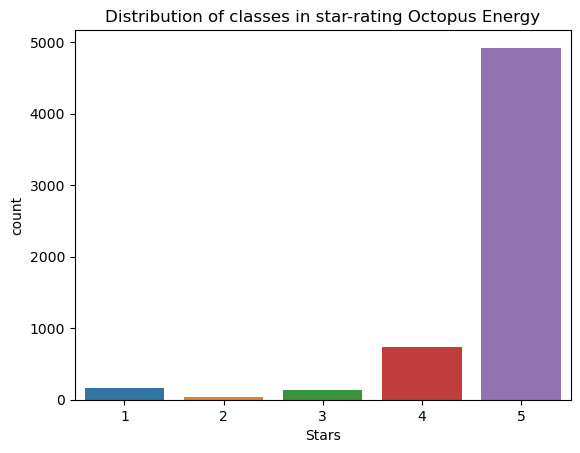

In [130]:
#plot distribution
plt.title("Distribution of classes in star-rating Octopus Energy")
sns.countplot(x='Stars', data=answers_octo);

We have strongly imbalanced data set as far as star ratings are concerned: Over 80% of the votes are positive with a 5 star rating. 

In [132]:
# remove unnecessary columns so that we only have the text columns and the star rating
all_texte_octo = answers_octo.drop(['DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
all_texte_octo.head()

Stars                                  Headline  \
20      1  Schlechter Service bei Anfragen per Mail   
22      1        ungefragt Duzen und Gendersprache!   
40      4                                Willkommen   
41      4          Der Anbieterwechsel klappt super   
49      4     Bis jetzt war alles zufriedenstellend   

                                              Comment  \
20  Wichtige Anfragen / Änderungen per Mail vom 02...   
22  ich habe es schon bereut diesen Anbieter gewäh...   
40  Der Wechsel war sehr einfach und verlief probl...   
41  Der Anbieterwechsel (Papierkram) hat super gek...   
49  Bis jetzt war alles zufriedenstellend Vom Erst...   

                                               Answer  
20  Hallo Jörg, vielen Dank für deine Zeit in der ...  
22  Hallo Thomas, vielen Dank für deine Zeit, die ...  
40  Hallo Kirsten,vielen Dank für deine gute Bewer...  
41  Hallo Thomas,danke dir vielmals für die gute B...  
49  Hallo Heiko,vielen Dank für deine gute Bewertu...

In [133]:
#check for duplicates
print("Number of duplicates: ", all_texte_octo.duplicated().sum()) # There are no duplicates

Number of duplicates:  0


#### Octopus Energy stop words

In [135]:
#import
import nltk
from nltk.corpus import stopwords

#set stop_words to German
stop_words_octo = set(stopwords.words('german'))

In [136]:
print(stop_words_octo)

{'euch', 'bin', 'an', 'dort', 'hatte', 'im', 'jenem', 'meines', 'während', 'musste', 'anderen', 'manche', 'keinem', 'aber', 'viel', 'weil', 'einiger', 'ihre', 'etwas', 'einem', 'nicht', 'sie', 'ihn', 'solche', 'welchem', 'eine', 'nichts', 'gegen', 'unter', 'dieselben', 'hier', 'meine', 'keinen', 'eines', 'sein', 'für', 'deinen', 'ihren', 'ohne', 'vom', 'bist', 'einige', 'einer', 'du', 'über', 'dich', 'diesen', 'kann', 'seinem', 'solchen', 'anderem', 'solchem', 'anderm', 'werden', 'hinter', 'einmal', 'ein', 'man', 'den', 'eures', 'oder', 'dasselbe', 'manches', 'indem', 'unserem', 'hat', 'ob', 'vor', 'würden', 'damit', 'manchen', 'soll', 'wenn', 'will', 'mir', 'hab', 'eurer', 'würde', 'zur', 'andere', 'derer', 'jeden', 'unsere', 'alle', 'auf', 'mich', 'anderr', 'er', 'aller', 'von', 'ihres', 'euer', 'seine', 'ihm', 'mein', 'meinen', 'nach', 'jener', 'nun', 'dem', 'seiner', 'eure', 'zwischen', 'wieder', 'welches', 'sehr', 'anderer', 'jenes', 'dein', 'jeder', 'selbst', 'der', 'keiner', 'so

In [137]:
# Add stop words 
stop_words_octo.update(["octopus", "energy", "'", '"', " ", "", "davon", "eine", "vs", "via", "unter", "sogar", "wäre", "und", "kommt", "götz", "kann", "dieser", "bla", "euch", "nein", "wurde", "per", "aber", "beim", "schon", "mal", "mehr", "seit"]) 

## Headlines

### Prep & Check

In [140]:
# remove unnecessary columns so that we only have the headline column
all_headlines_octo = answers_octo.drop(['Stars', 'Comment', 'Answer', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
all_headlines_octo.head()



Headline
20  Schlechter Service bei Anfragen per Mail
22        ungefragt Duzen und Gendersprache!
40                                Willkommen
41          Der Anbieterwechsel klappt super
49     Bis jetzt war alles zufriedenstellend

In [141]:
#check for duplicates
print("Number of duplicates: ", all_headlines_octo.duplicated().sum()) ## There are duplicates

Number of duplicates:  1236


In [142]:
#create string for all headlines, insert a space between each line
headlines_octo = ""
for value in all_headlines_octo.Headline:
    headlines_octo += value + ' '

In [143]:
#check 
headlines_octo[:500]

'Schlechter Service bei Anfragen per Mail ungefragt Duzen und Gendersprache! Willkommen Der Anbieterwechsel klappt super Bis jetzt war alles zufriedenstellend Alles prima im ganzen Ich bin zufrieden Reibungslos Neukunde Octopus Energy Germany Ich habe noch keine Erfahrung..ab… Abwicklung einfach Schnelle Bearbeitung Preis und Leistungsverhältnis Abwarten Gerne wieder bisher zufrieden okay Keinen Bonus für Umweltbewusste Nur fast sehr gut... Kundendienst gut erreichbar Unkompliziert und schnell. Ü'

### Visualization Word Cloud

To compare positive and negative feedback, let us have a look at 1 and 5 star ratings separately.

#### All Headlines for Octopus Energy

In [147]:
# define stopwords - see above
# apply get_clean_wordslist
octo_headlines_all = get_clean_wordslist(headlines_octo, stop_words_octo)
#check 
octo_headlines_all[:20]

['schlechter',
 'service',
 'anfragen',
 'mail',
 'ungefragt',
 'duzen',
 'gendersprache',
 'willkommen',
 'anbieterwechsel',
 'klappt',
 'super',
 'zufriedenstellend',
 'prima',
 'ganzen',
 'zufrieden',
 'reibungslos',
 'neukunde',
 'germany',
 'erfahrungab',
 'abwicklung']

In [148]:
print("Total number of words after preprocessing: ",len(octo_headlines_all))

Total number of words after preprocessing:  13720


In [149]:
from wordcloud import WordCloud

#set wordcloud
wc = WordCloud(background_color= 'gray', #background color
               max_words= 1000, #maximum number of words to display
               max_font_size= 70, #max font size
               random_state= 42,
               collocations=False, #avoid duplicated words
               colormap='plasma' #colormap from matplotlib
               #mask=mask #mask img needs to be instantiated
              )

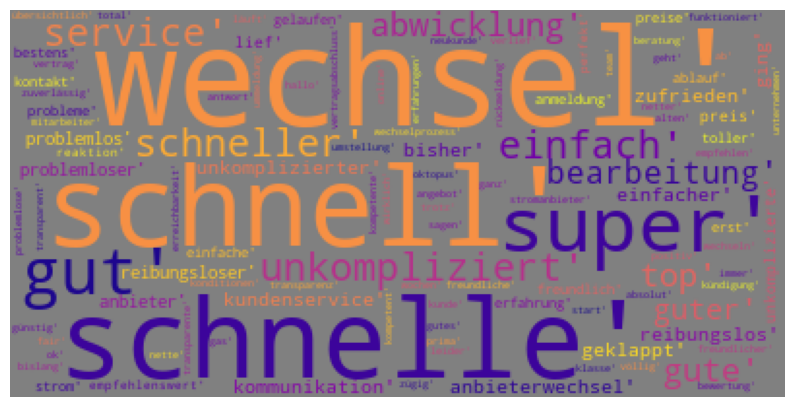

In [150]:
import matplotlib.pyplot as plt

# Generate and display the word cloud
plt.figure(figsize= (10,10)) # Initialization of a figure
wc.generate(str(octo_headlines_all)) # "Calculation" of the wordcloud from text
plt.imshow(wc) # Display
plt.axis("off")
plt.show()

#### Positive Headlines for Octopus Energy

In [152]:
## select data
pos_answers_octo = answers_octo.loc[answers_octo['Stars'] == 5]
pos_answers_octo.shape

(4922, 20)

In [153]:
#create string for positive headlines, insert a space between each line
pos_headlines_octo = ""
for value in pos_answers_octo.Headline:
    pos_headlines_octo += value + ' '

In [154]:
# apply get_clean_wordslist
octo_headlines_pos = get_clean_wordslist(pos_headlines_octo, stop_words_octo)
#check 
octo_headlines_pos[:20]

['sterne',
 'schnelle',
 'abwicklung',
 'guter',
 'preis',
 'super',
 'schnelle',
 'abwicklung',
 'bequemer',
 'wechsel',
 'unkomplizierte',
 'zuverlässige',
 'schnelle',
 'bearbeitung',
 'wechsel',
 'unkompliziert',
 'schnell',
 'information',
 'wechsel',
 'kam']

In [155]:
print("Total number of words after preprocessing: ",len(octo_headlines_pos))

Total number of words after preprocessing:  11144


In [156]:
#import image
from PIL import Image
import numpy as np

mask = np.array(Image.open("daumen-hoch.jpg"))

In [157]:
from wordcloud import WordCloud


#set wordcloud
wc = WordCloud(background_color= 'white', #background color
               max_words= 1000, #maximum number of words to display
               max_font_size= 70, #max font size
               random_state= 42,
               collocations=False,
               colormap='winter',
               mask=mask #mask img needs to be instantiated
              )

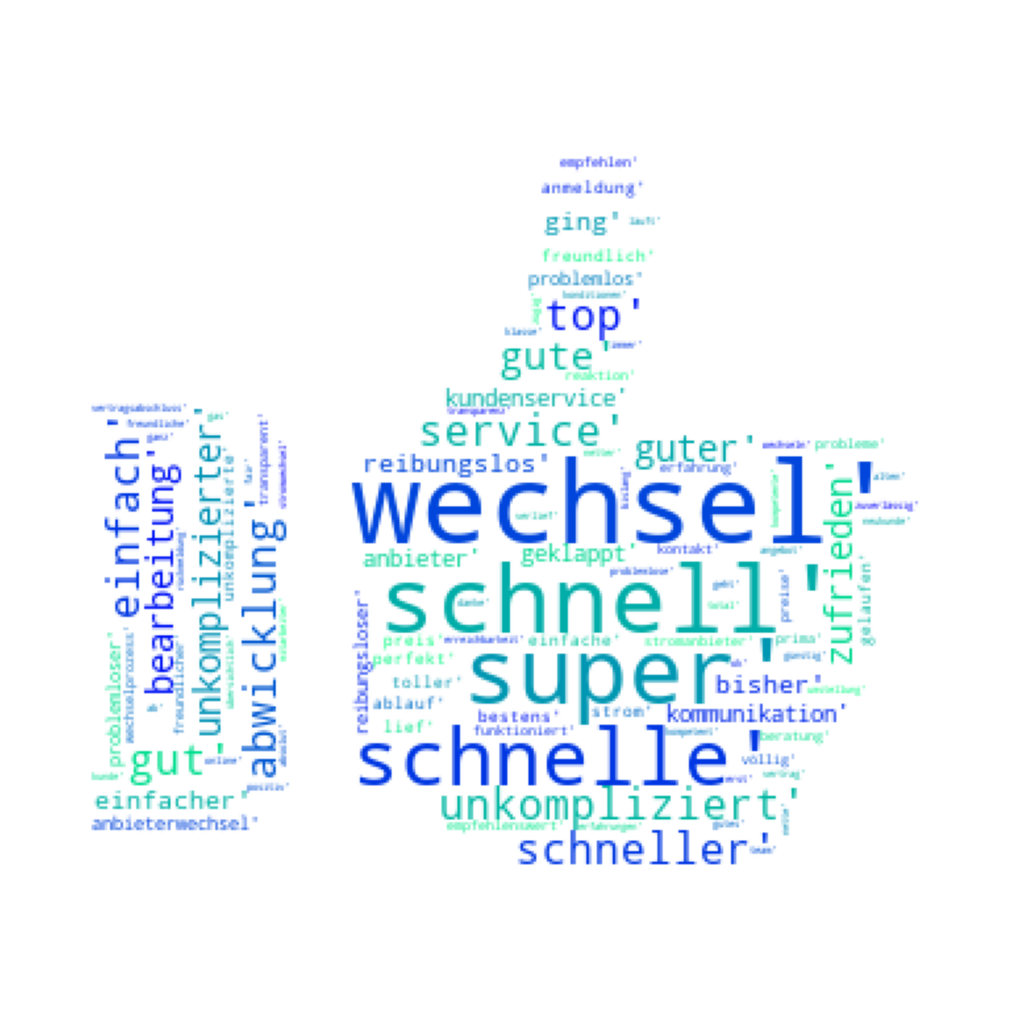

In [158]:
import matplotlib.pyplot as plt

# Generate and display the word cloud
plt.figure(figsize= (10,10)) # Initialization of a figure
wc.generate(str(octo_headlines_pos)) # "Calculation" of the wordcloud from text
plt.imshow(wc) # Display
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

#### Negative Headlines for Octopus Energy

In [160]:
## select data
neg_answers_octo = answers_octo.loc[answers_octo['Stars'] == 1]
neg_answers_octo.shape

(166, 20)

In [161]:
#create string for positive headlines, insert a space between each line
neg_headlines_octo = ""
for value in neg_answers_octo.Headline:
    neg_headlines_octo += value + ' '
    

In [162]:
# apply get_clean_wordslist
octo_headlines_neg = get_clean_wordslist(neg_headlines_octo, stop_words_octo)
#check 
octo_headlines_neg[:20]

['schlechter',
 'service',
 'anfragen',
 'mail',
 'ungefragt',
 'duzen',
 'gendersprache',
 'vertrag',
 'geht',
 'erst',
 'ab',
 'reibungslosen',
 'übergang',
 'schlechter',
 'datenschutz',
 'reaktion',
 'mails',
 'mieser',
 'service',
 'niemals']

In [163]:
print("Total number of words after preprocessing: ",len(octo_headlines_neg))

Total number of words after preprocessing:  427


In [164]:
#import image
from PIL import Image
import numpy as np

mask2 = np.array(Image.open("daumen-runter.jpg"))

In [165]:
from wordcloud import WordCloud

#set wordcloud
wc = WordCloud(background_color= "white", #background color
               max_words= 1000, #maximum number of words to display
               max_font_size= 70, #max font size
               random_state= 42,
               collocations=False,
               colormap='autumn',
               mask=mask2 #mask img needs to be instantiated
              )

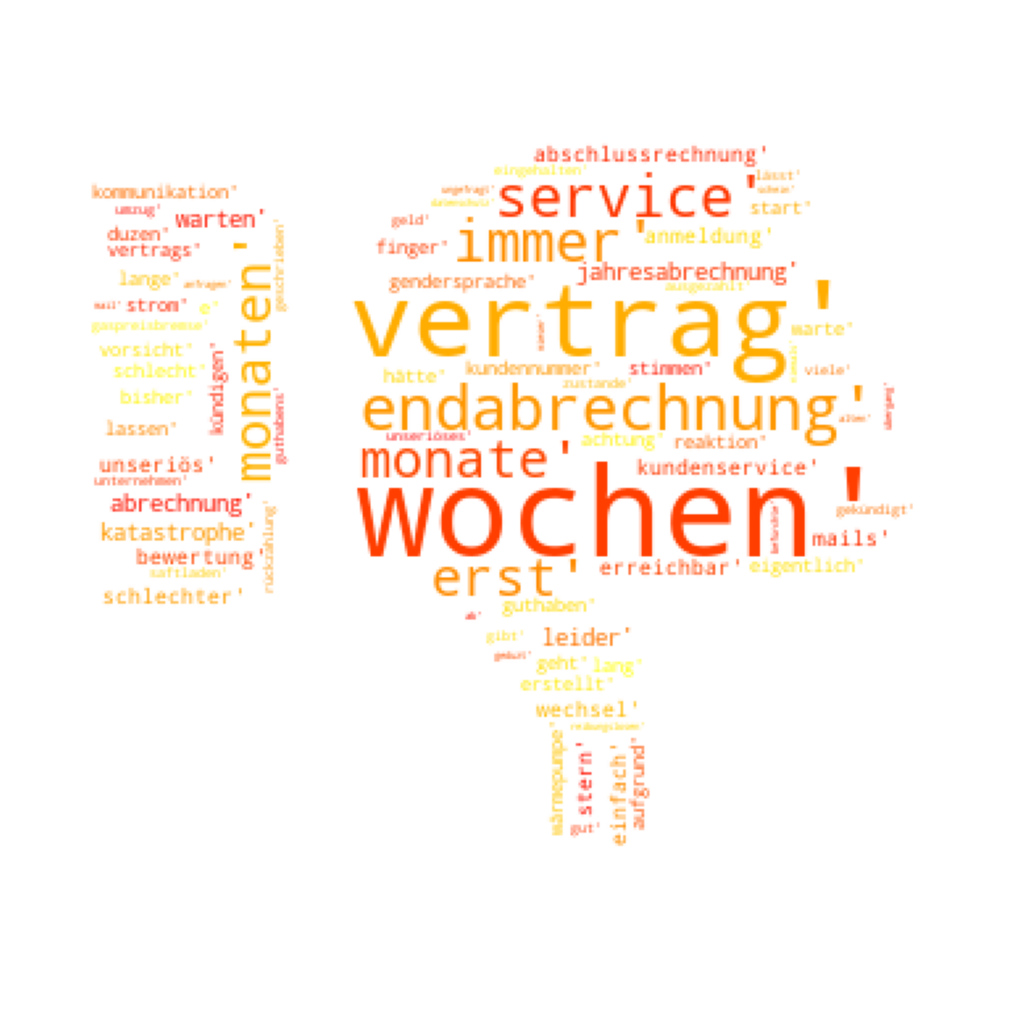

In [166]:
import matplotlib.pyplot as plt

# Generate and display the word cloud
plt.figure(figsize= (10,10)) # Initialization of a figure
wc.generate(str(octo_headlines_neg)) # "Calculation" of the wordcloud from text
plt.imshow(wc) # Display
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

### Bar charts

#### Positive Headlines

In [169]:
## Create Data Frame with most common words and word count for positive feedback
# input for positive feedback: pos_headlines_octo
# apply get_wordcount_df
df_pos_headline_octo = get_wordcount_df(pos_headlines_octo, stop_words_octo)
df_pos_headline_octo.head()

words  count
0        wechsel    714
1        schnell    475
2          super    449
3       schnelle    445
4  unkompliziert    244

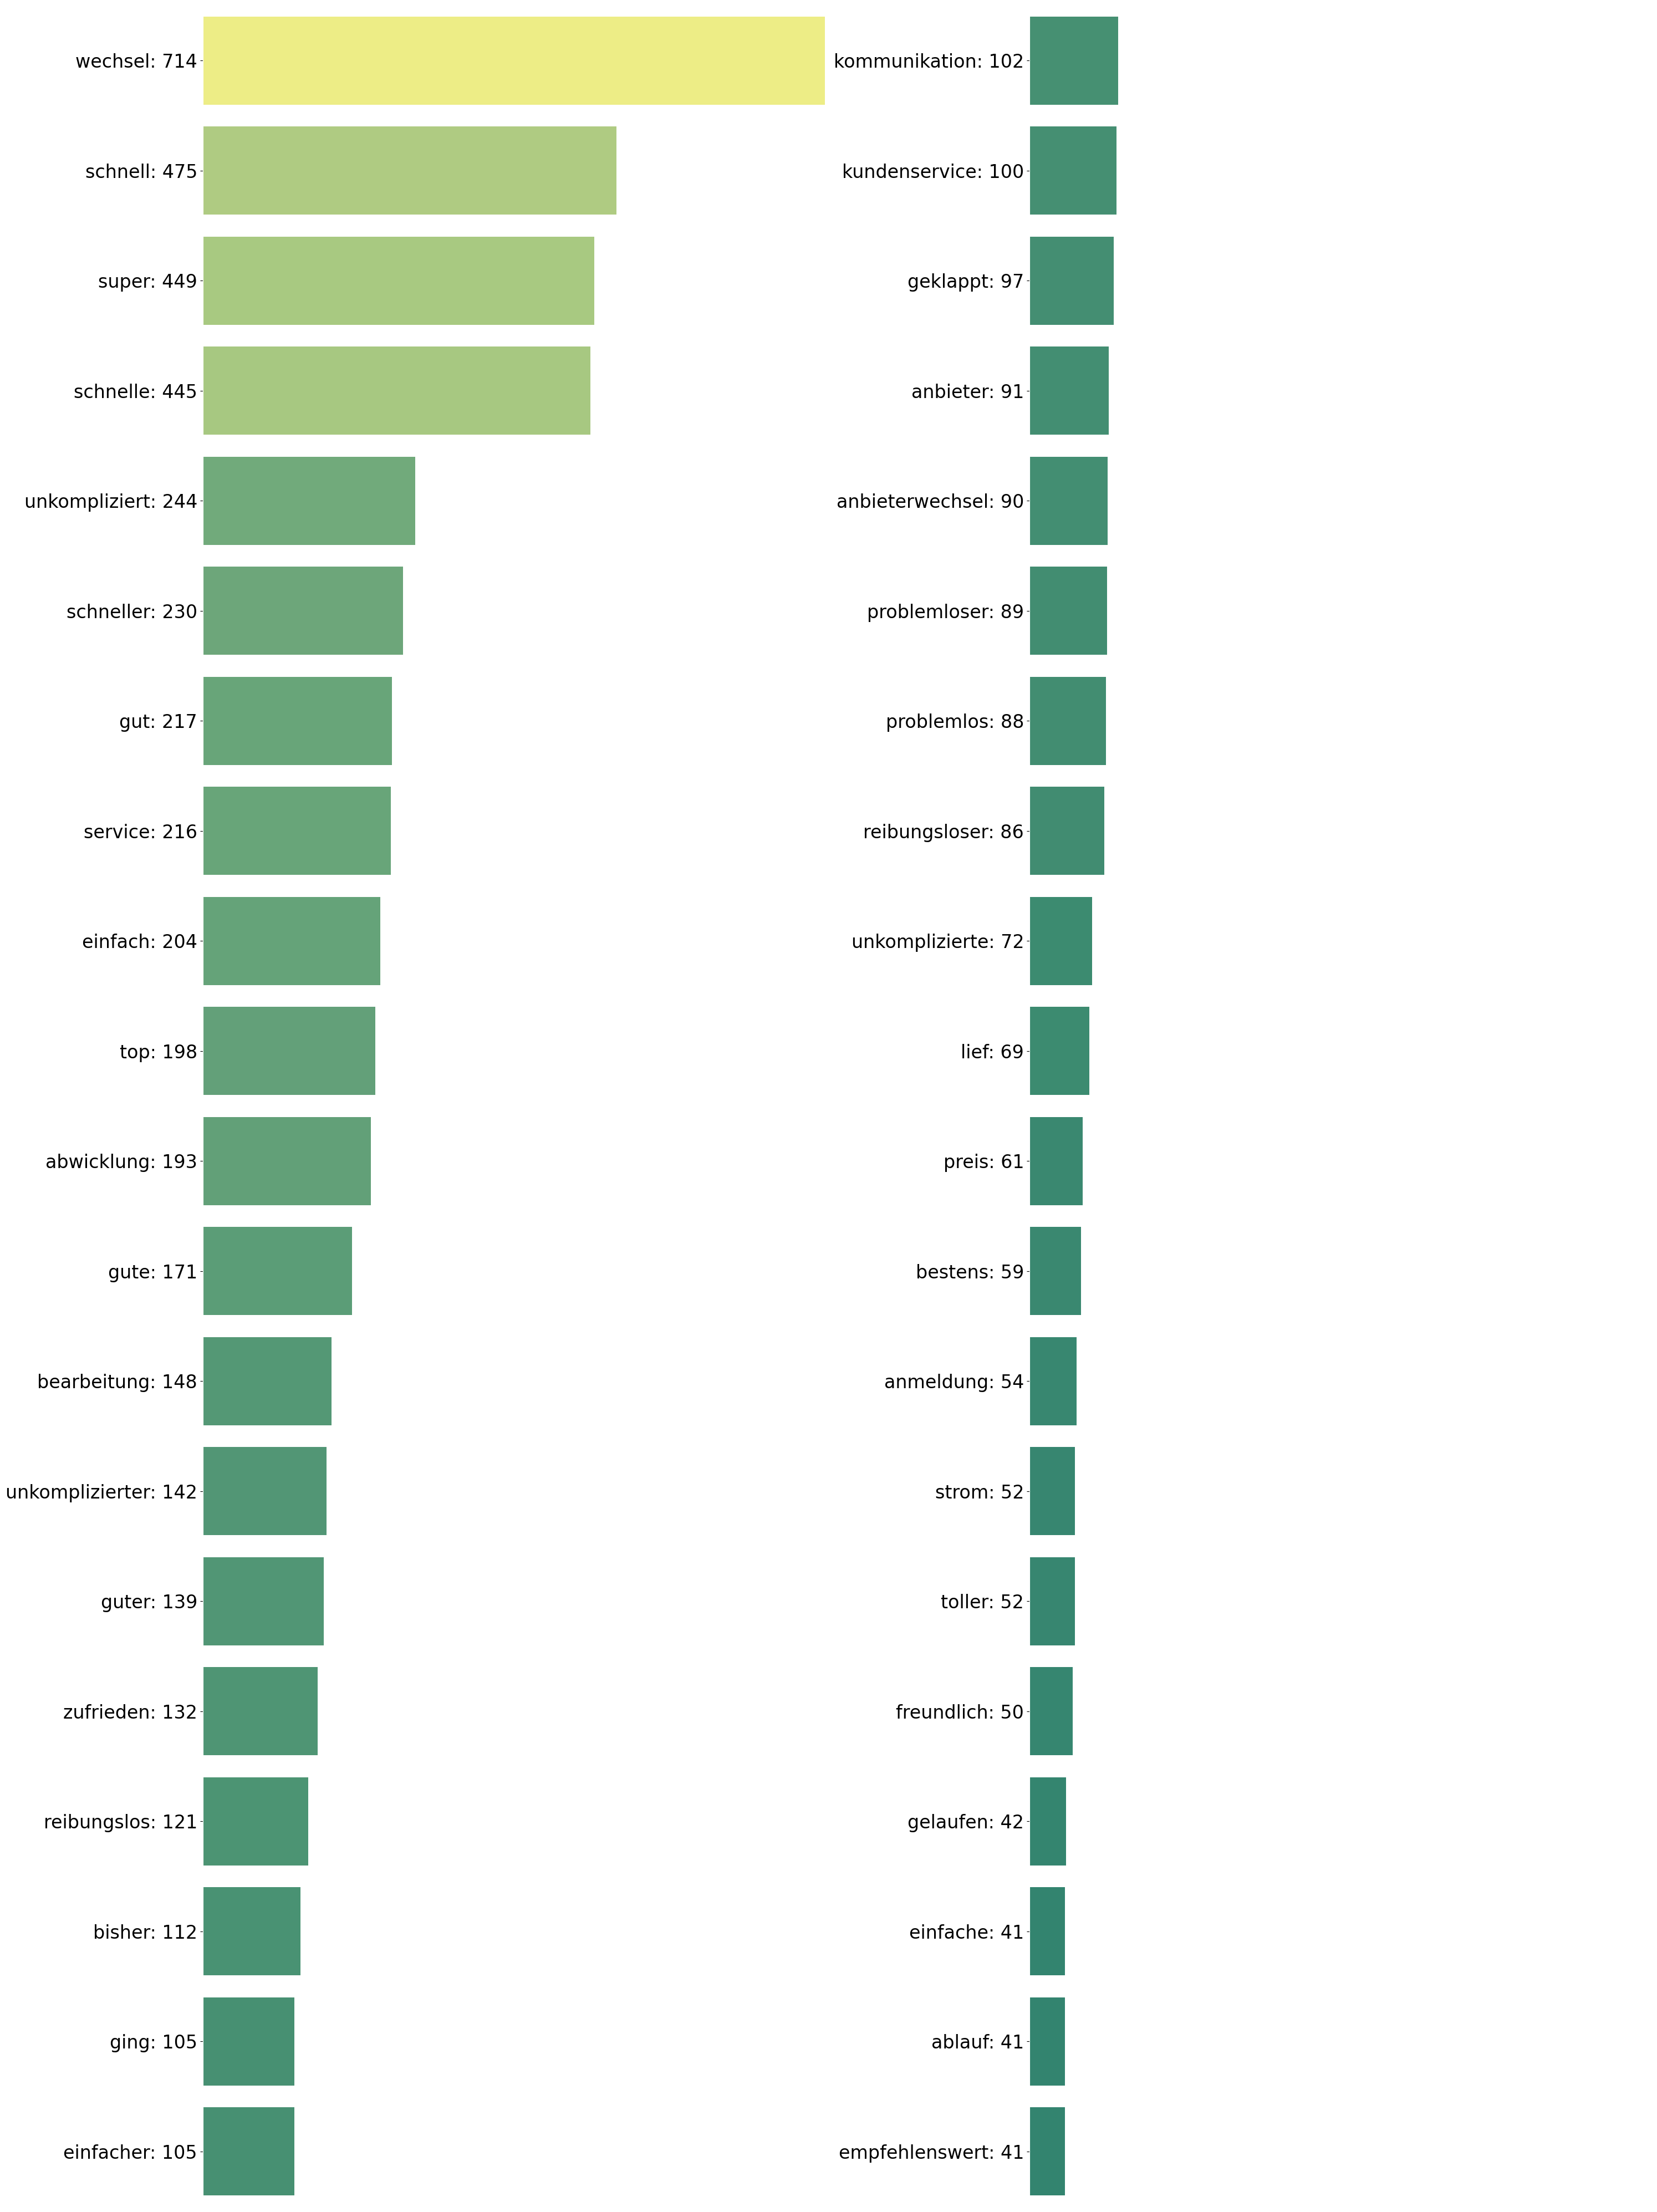

In [170]:
# Plot positive key words
# index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

# variable definition
n = df_pos_headline_octo['count'].max() ## add df!!
color_dict = get_colordict('summer', n, 1)

#plot
fig, axs = plt.subplots(1, 2, figsize=(30,40), facecolor='white', squeeze=False)
for col, idx in zip(range(0,2), index_list):
    df = df_pos_headline_octo[idx[0]:idx[-1]]         ## add df!!
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+0.5)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=24)
    axs[0][col].set(xticklabels=[])
    axs[0][col].tick_params(bottom=False)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()
plt.show();

Interpretation:

Customers praise the easy (einfach, einfacher), uncomplicated (unkompliziert, reibungslos, problemlos, problemloser) and fast (schnell, schneller) transactions like change of supplier (Anbieterwechsel, Abwicklung, Ablauf), also for Contact with Customer service (Kundenservice, Service, Kommunikation, bearbeitung). Adjectives like good (gut, toll, super), friendly (freundlich),to be recommended (empfehlenswert) and top are very positive Feedback; also the price (Preis) is mentioned.

#### Negative Headlines

In [173]:
## Create Data Frame with most common words and word count for negative feedback
# input for positive feedback: neg_headlines_octo
# apply get_wordcount_df
df_neg_headline_octo = get_wordcount_df(neg_headlines_octo, stop_words_octo)
df_neg_headline_octo.head()

words  count
0         wochen     11
1        vertrag      9
2  endabrechnung      6
3        service      5
4          immer      5

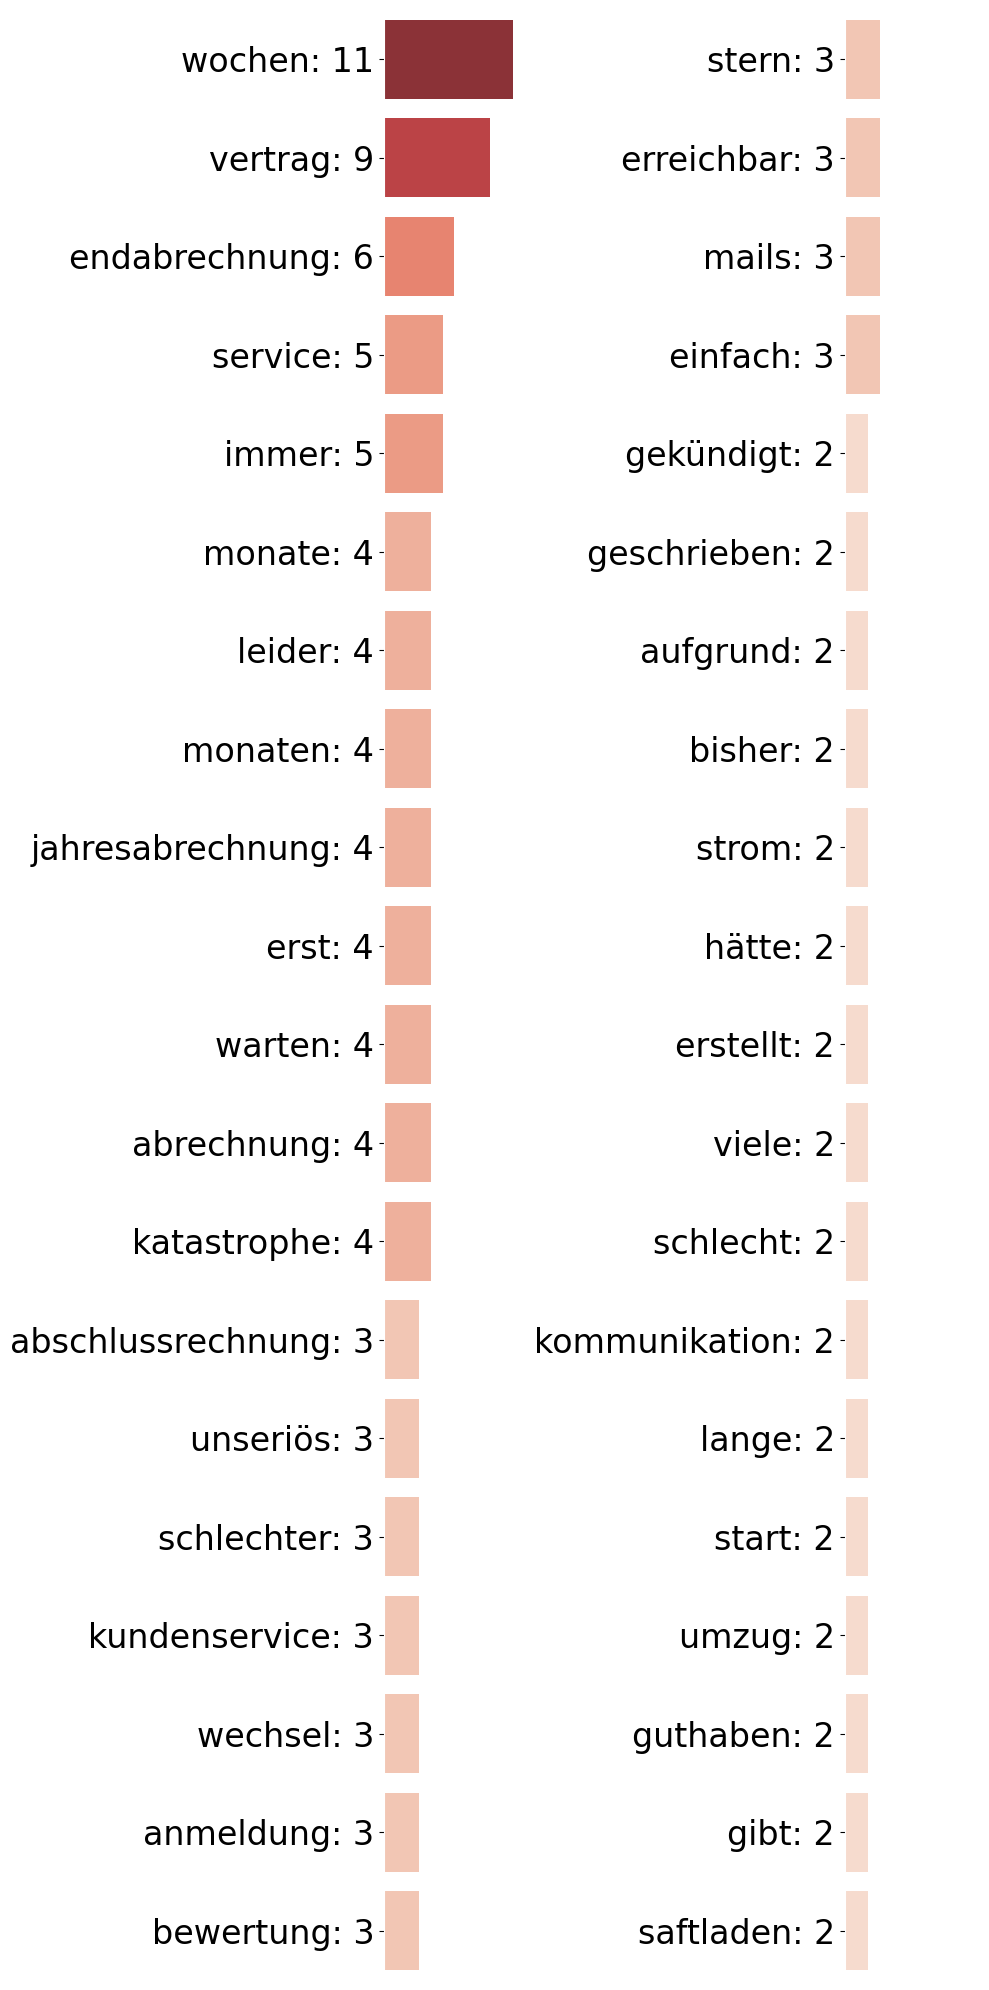

In [174]:
# Plot negative key words
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

# variable definition
n = df_neg_headline_octo['count'].max()  #dataframe  # enter df!!
color_dict = get_colordict('Reds', n, 1) #color dicitionary from matplotlib

#plot
fig, axs = plt.subplots(1, 2, figsize=(10,20), facecolor='white', squeeze=False)
for col, idx in zip(range(0,2), index_list):
    df = df_neg_headline_octo[idx[0]:idx[-1]]  # enter df!!
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+0.5)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=24)
    axs[0][col].set(xticklabels=[])
    axs[0][col].tick_params(bottom=False)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()    
plt.show();

Interpretation: 

Apparently, there have been issues with longer waiting times (wochen, monat, monate), most lkely invoice (abrechnung) and final billing (endabrechnung, jahresabrechnung).

### Donut Chart

As we have seen, some key words can be found in both positive and negative headlines, so let us have a look at the 30 most listed words.

In [178]:
## Create Data Frame with most common words and word count
# input for positive feedback: headlines_octo
# apply get_wordcount_df
df_headline_all_octo = get_wordcount_df(headlines_octo, stop_words_octo)
df_headline_all_octo.head()

words  count
0   wechsel    827
1   schnell    519
2  schnelle    507
3     super    467
4       gut    297

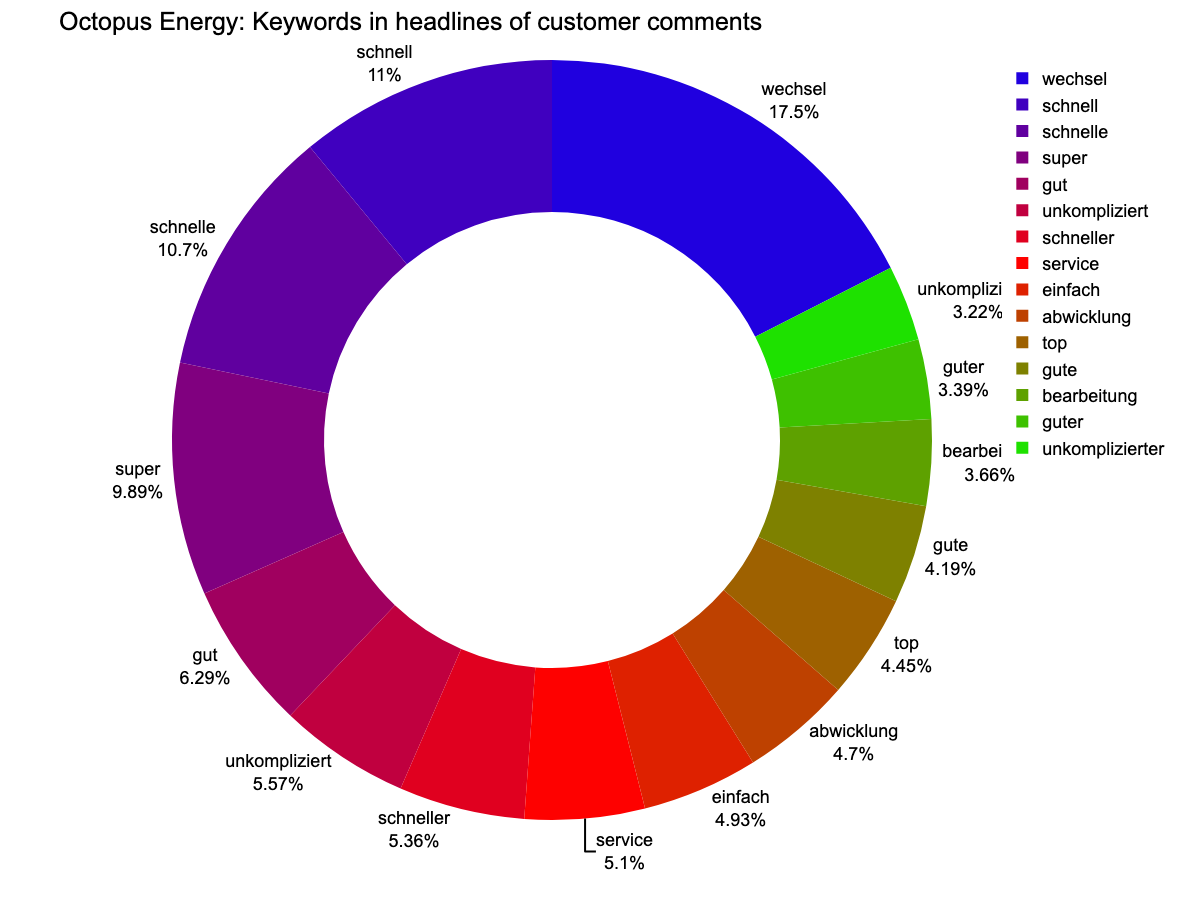

In [179]:
# donut chart
n = 15 # number of key words
pal = list(sns.color_palette(palette='brg', n_colors=n).as_hex())

import plotly.express as px
fig = px.pie(df_headline_all_octo[0:n], values='count', names='words',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 1200, height = 900, 
                  title="Octopus Energy: Keywords in headlines of customer comments",
                  font=dict(
                      family="Arial",
                      size=18, 
                      color="black"
                  )                 

                  )
fig.show()

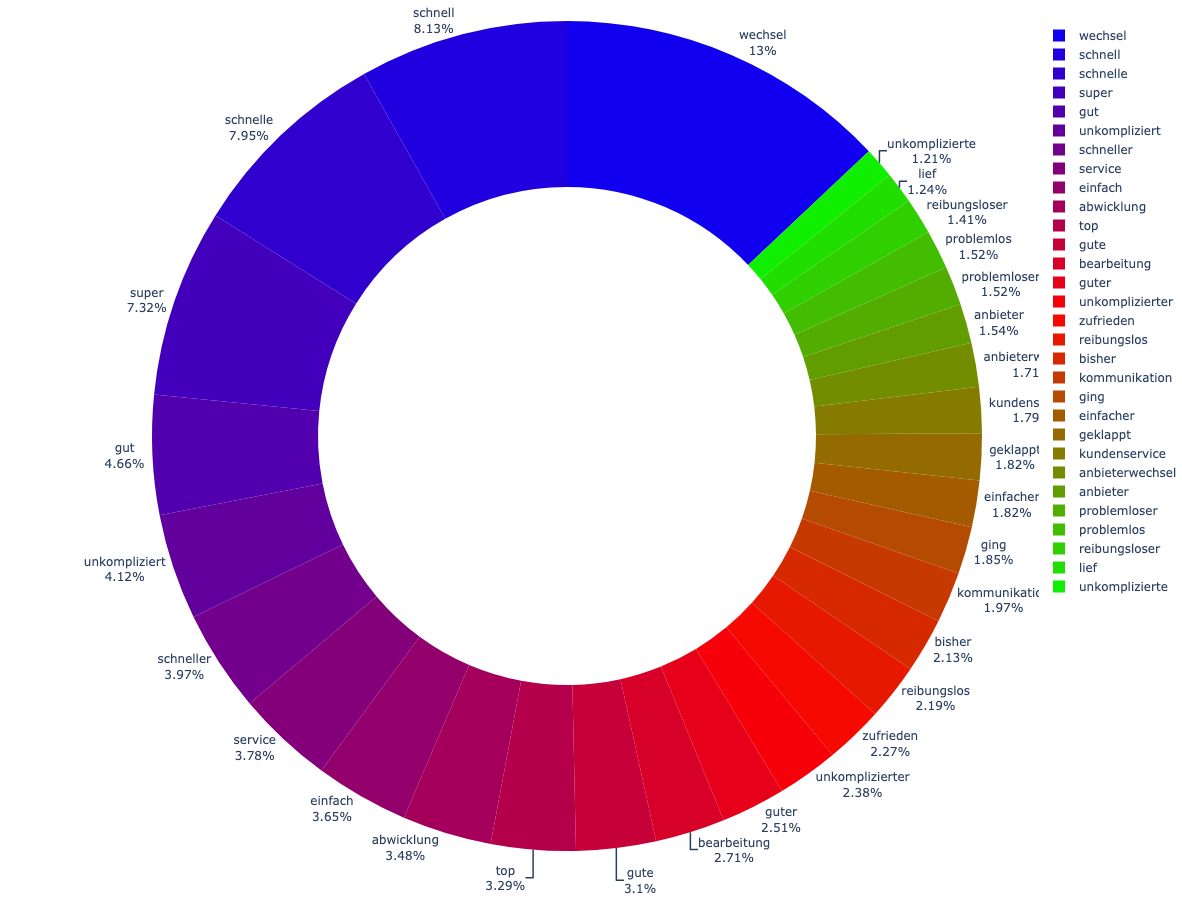

In [180]:
# donut chart
n = 30
pal = list(sns.color_palette(palette='brg', n_colors=n).as_hex())

import plotly.express as px
fig = px.pie(df_headline_all_octo[0:n], values='count', names='words',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 1200, height = 900,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

## Customer Comments

### Donut chart all comments

In [183]:
# remove unnecessary columns so that we only have the headline column
all_comments_octo = answers_octo.drop(['Stars', 'Headline', 'Answer', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
all_comments_octo.head()


Comment
20  Wichtige Anfragen / Änderungen per Mail vom 02...
22  ich habe es schon bereut diesen Anbieter gewäh...
40  Der Wechsel war sehr einfach und verlief probl...
41  Der Anbieterwechsel (Papierkram) hat super gek...
49  Bis jetzt war alles zufriedenstellend Vom Erst...

In [184]:
#check for duplicates
print("Number of duplicates: ", all_comments_octo.duplicated().sum()) ## There are duplicates

Number of duplicates:  23


In [185]:
# drop duplicates
all_comments_octo.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
print("Number of duplicates: ", all_comments_octo.duplicated().sum()) ## no more duplicates

Number of duplicates:  0


In [186]:
all_comments_octo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5978 entries, 20 to 8059
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5978 non-null   object
dtypes: object(1)
memory usage: 93.4+ KB


In [187]:
#create string for all comments, insert a space between each line
comments_octo = ""
for value in all_comments_octo.Comment:
    comments_octo += value + ' '

In [188]:
#check 
comments_octo[:500]

'Wichtige Anfragen / Änderungen per Mail vom 02.08., meinen Vertrag betreffend, wurden erst final am 29.08. beantwortet, nachdem ich einige Male per Mail und telefonisch nachfassen musste. Mein Verständnis für einen guten, kundenorientierten Kundenservice ist leider ein Anderes. ich habe es schon bereut diesen Anbieter gewählt zu haben. Die Kommunikation ist das Allerletzte. Man wird wie bei Ikea und H&M ungefraht geduzt. Außerdem schreiben sie in dieser gräßlichen Gendersprache. Gone woke, go br'

In [189]:
## Create Data Frame with most common words and word count
# apply get_wordcount_df
df_comments_octo = get_wordcount_df(comments_octo, stop_words_octo)
df_comments_octo.head()

words  count
0   wechsel   1423
1   schnell   1141
2  schnelle    889
3     super    799
4       gut    799

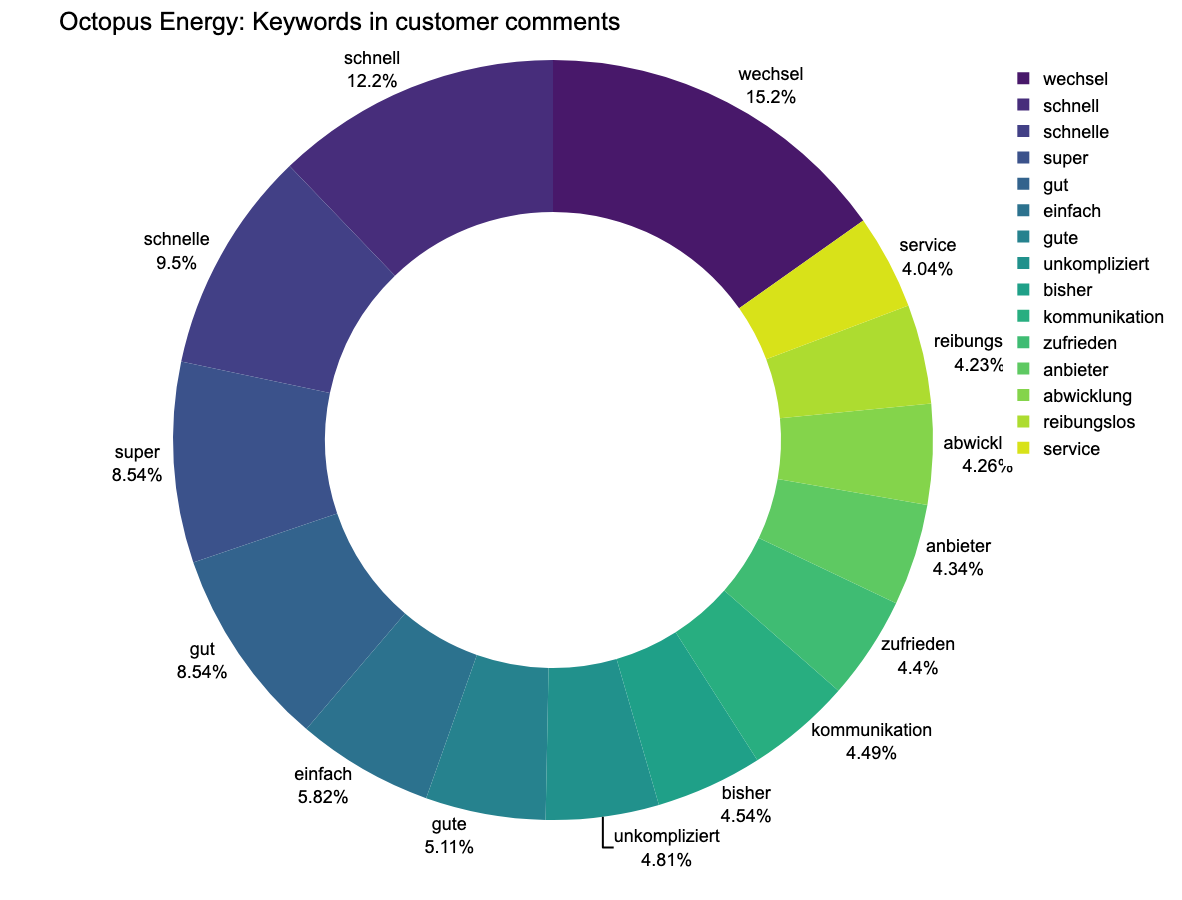

In [190]:
# donut chart
n = 15
pal = list(sns.color_palette(palette='viridis', n_colors=n).as_hex())

import plotly.express as px
fig = px.pie(df_comments_octo[0:n], values='count', names='words',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 1200, height = 900, 
                  title="Octopus Energy: Keywords in customer comments",
                  font=dict(
                      family="Arial",
                      size=18, 
                      color="black"
                  )
                 )
fig.show()

In [191]:
# apply get_clean_wordslist
octo_comments_all = get_clean_wordslist(comments_octo, stop_words_octo)
print("Total number of words after preprocessing: ",len(octo_comments_all))

Total number of words after preprocessing:  62267


### Positive Customer Comments

In [193]:
## select data 
pos_comments_octo = answers_octo.loc[answers_octo['Stars'] == 5]
pos_comments_octo.shape

(4922, 20)

In [194]:
# remove unnecessary columns so that we only have the headline column
pos_comments_octo = pos_comments_octo.drop(['Stars', 'Headline', 'Answer', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
pos_comments_octo.head()



Comment
283  • Der Wechsel vom alten Strom/Gas Anbieter hat...
284  Preis ist gut und Umstellung auf neuen Anbiete...
286         Super schnelle, unkomplizierte Abwicklung.
287  Jat alles gut funktioniert, keine unnötige Bür...
288  unkomplizierte und zuverlässige Abwicklung, tr...

In [195]:
#check for duplicates
print("Number of duplicates: ", pos_comments_octo.duplicated().sum()) ## There are duplicates

Number of duplicates:  16


In [196]:
# drop duplicates
pos_comments_octo.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
print("Number of duplicates: ", pos_comments_octo.duplicated().sum()) ## no more duplicates

Number of duplicates:  0


In [197]:
#create string for positive comments, insert a space between each line
octo_comments_pos = ""
for value in pos_comments_octo.Comment:
    octo_comments_pos += value + ' '

In [198]:
## Create Data Frame with most common words and word count
# input for positive feedback: octo_comments_pos
# apply get_wordcount_df
df_pos_comments_octo = get_wordcount_df(octo_comments_pos, stop_words_octo)
df_pos_comments_octo.head()

words  count
0   wechsel   1223
1   schnell   1023
2  schnelle    790
3     super    743
4       gut    601

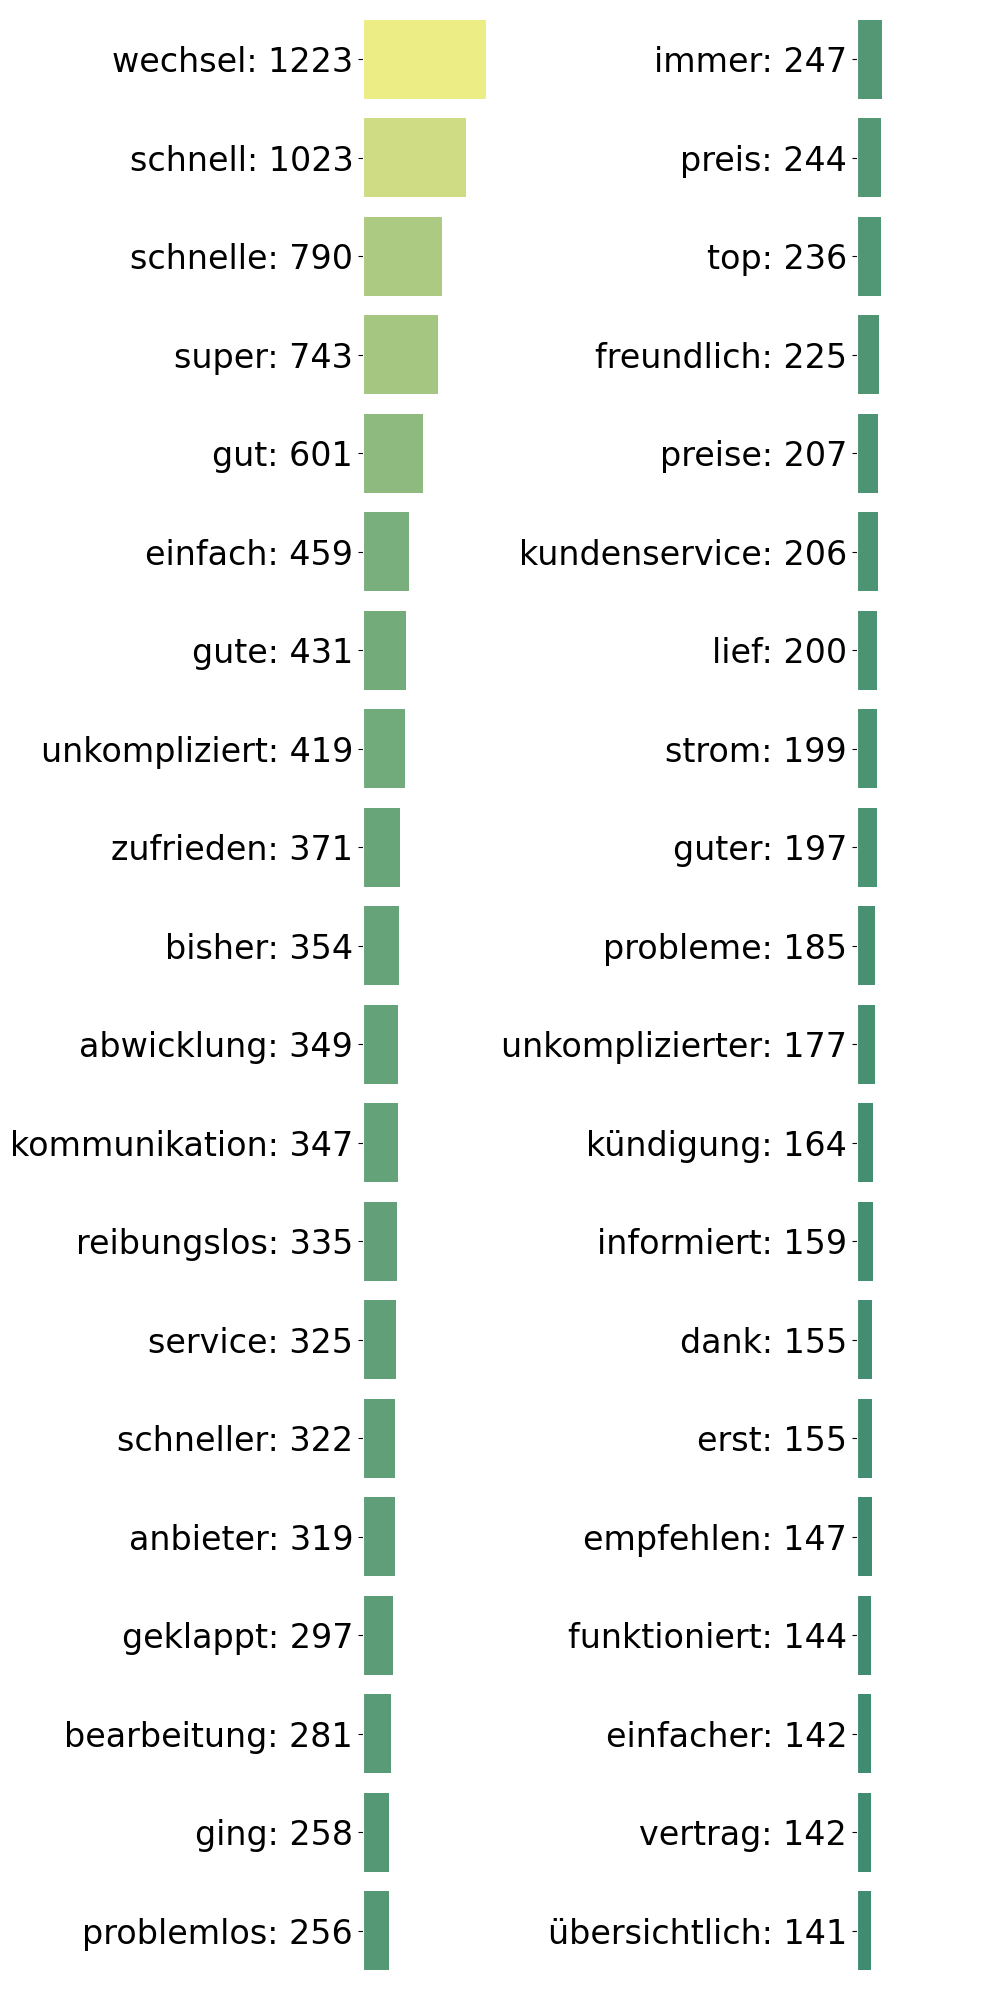

In [199]:
# Plot positive key words
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

# variable definition
n = df_pos_comments_octo['count'].max()     # enter df!!
color_dict = get_colordict('summer', n, 1)

#plot
fig, axs = plt.subplots(1, 2, figsize=(10,20), facecolor='white', squeeze=False)
for col, idx in zip(range(0,2), index_list):
    df = df_pos_comments_octo[idx[0]:idx[-1]]     # enter df!!
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+0.5)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=24)
    axs[0][col].set(xticklabels=[])
    axs[0][col].tick_params(bottom=False)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()

plt.show();

Interpretation:

The same picture as in the headlines analysis

In [201]:
# apply get_clean_wordslist
octo_comments_pos = get_clean_wordslist(octo_comments_pos, stop_words_octo)
print("Total number of words after preprocessing: ",len(octo_comments_pos))

Total number of words after preprocessing:  45428


### Negative customer comments

In [203]:
## select data = neg_answers_eon
neg_comments_octo = answers_octo.loc[answers_octo['Stars'] == 1]
neg_comments_octo.shape

(166, 20)

In [204]:
# remove unnecessary columns so that we only have the headline column
neg_comments_octo = neg_comments_octo.drop(['Stars', 'Headline', 'Answer', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
neg_comments_octo.head()



Comment
20   Wichtige Anfragen / Änderungen per Mail vom 02...
22   ich habe es schon bereut diesen Anbieter gewäh...
251  Mein Vertrag geht erst ab 01.07.2024!Wieso so ...
282  Keinen Reibungslosen Übergang. Ich musste 5 Ta...
684  Sehr unzufrieden, da sie trotz mehreren Emails...

In [205]:
#check for duplicates
print("Number of duplicates: ", neg_comments_octo.duplicated().sum()) ## There are duplicates

Number of duplicates:  0


In [206]:
#create string for negative comments, insert a space between each line
octo_comments_neg = ""
for value in neg_comments_octo.Comment:
    octo_comments_neg += value + ' '

In [207]:
## Create Data Frame with most common words and word count
# input for negative feedback: octo_comments_neg
# apply get_wordcount_df
df_neg_comments_octo = get_wordcount_df(octo_comments_neg, stop_words_octo)
df_neg_comments_octo.head()

words  count
0       immer     46
1      wochen     42
2     vertrag     42
3    anbieter     27
4  abrechnung     25

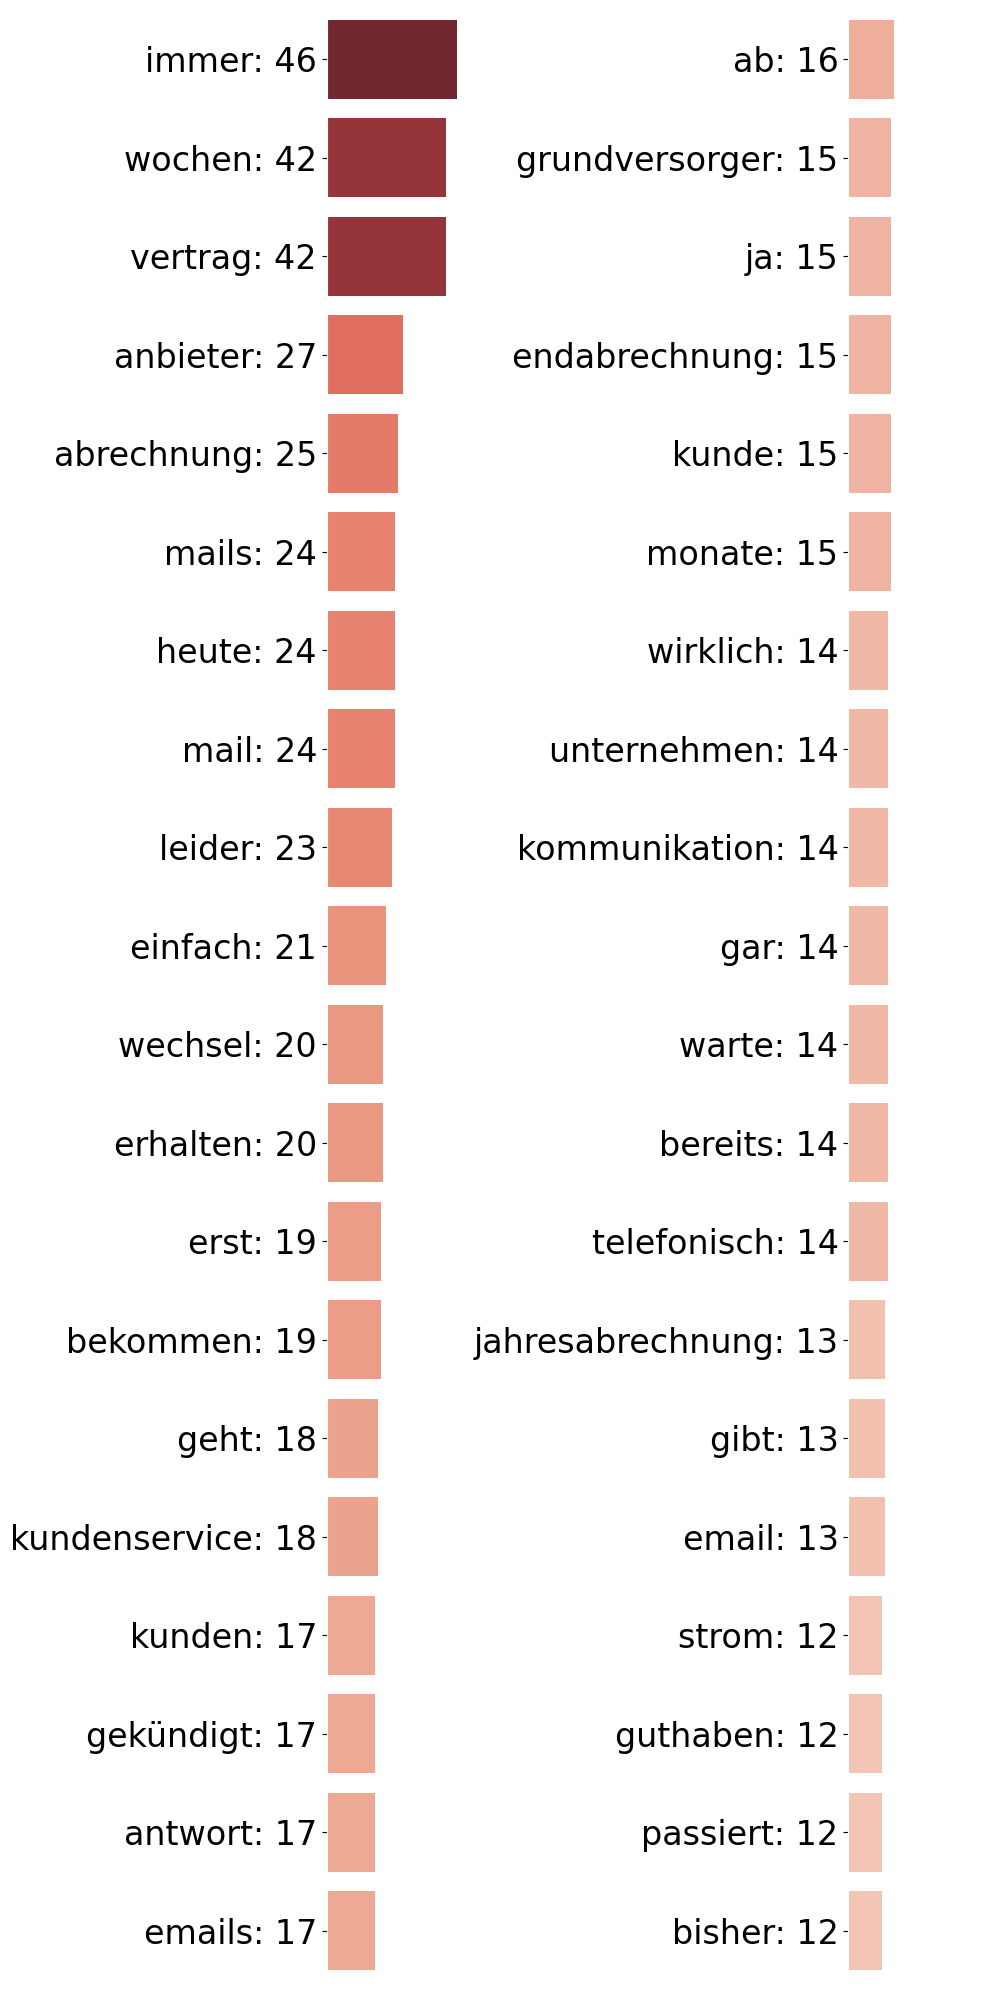

In [208]:
# Plot negative key words
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

# variable definition
n = df_neg_comments_octo['count'].max() # enter df!!
color_dict = get_colordict('Reds', n, 1)

#plot
fig, axs = plt.subplots(1, 2, figsize=(10,20), facecolor='white', squeeze=False)
for col, idx in zip(range(0,2), index_list):
    df = df_neg_comments_octo[idx[0]:idx[-1]]     # enter df!!
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+0.5)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=24)
    axs[0][col].set(xticklabels=[])
    axs[0][col].tick_params(bottom=False)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()

plt.show();

Interpretation:

The impression from the headline section is confirmed; in addition we see here an issue with the email communication.

In [210]:
# apply get_clean_wordslist
comments_octo_neg = get_clean_wordslist(octo_comments_neg, stop_words_octo)
print("Total number of words after preprocessing: ",len(comments_octo_neg))

Total number of words after preprocessing:  4641


## Supplier Answers

### Prep & check

In [213]:
# remove unnecessary columns so that we only have the headline column
all_answers_octo = answers_octo.drop(['Stars', 'Comment', 'Headline', 'DoE.day', 'DoE.month',
       'DoE.year', 'DoP.day', 'DoP.month', 'DoP.year', 'DoA.day', 'DoA.month',
       'DoA.year', 'Comment_TF', 'Answer_TF', 'Company', 'Words_Headline',
       'Words_Comment', 'Words_Answer', 'Response_time'], axis=1)
all_answers_octo.head()

Answer
20  Hallo Jörg, vielen Dank für deine Zeit in der ...
22  Hallo Thomas, vielen Dank für deine Zeit, die ...
40  Hallo Kirsten,vielen Dank für deine gute Bewer...
41  Hallo Thomas,danke dir vielmals für die gute B...
49  Hallo Heiko,vielen Dank für deine gute Bewertu...

In [214]:
#check for duplicates
print("Number of duplicates: ", all_answers_octo.duplicated().sum()) ## There are duplicates

Number of duplicates:  472


In [215]:
# Keep duplicates
#all_answers_octo.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
#print("Number of duplicates: ", all_answers_octo.duplicated().sum()) ## no more duplicates

In [216]:
all_answers_octo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6001 entries, 20 to 8059
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Answer  6001 non-null   object
dtypes: object(1)
memory usage: 93.8+ KB


In [217]:
#create string for all comments, insert a space between each line
answers = ""
for value in all_answers_octo.Answer:
    answers += value + ' '

In [218]:
#check 
answers[:500]

'Hallo Jörg, vielen Dank für deine Zeit in der du diese Bewertung geschrieben hast. Es tut uns sehr Leid, dass es in deinem Fall zu Schwierigkeiten gekommen ist. Wie ich sehe ist dein Vertrag bereits gekündigt. Das tut uns Leid. Beste GrüßeDein Octopus Energy Team Hallo Thomas, vielen Dank für deine Zeit, die du dir für deine Bewertung genommen hast.  Wir als Unternehmen haben uns dazu entschlossen, eine genderneutrale Art der Kommunikation zu verwenden.  Sollten dich unsere Beweggründe interessi'

In [219]:
## Create Data Frame with most common words and word count

# apply get_wordcount_df
df_answers_octo = get_wordcount_df(answers, stop_words_octo)
df_answers_octo.head()

words  count
0            team   5623
1           hallo   5493
2            dank   5061
3      grüssedein   4912
4  bewertungbeste   2189

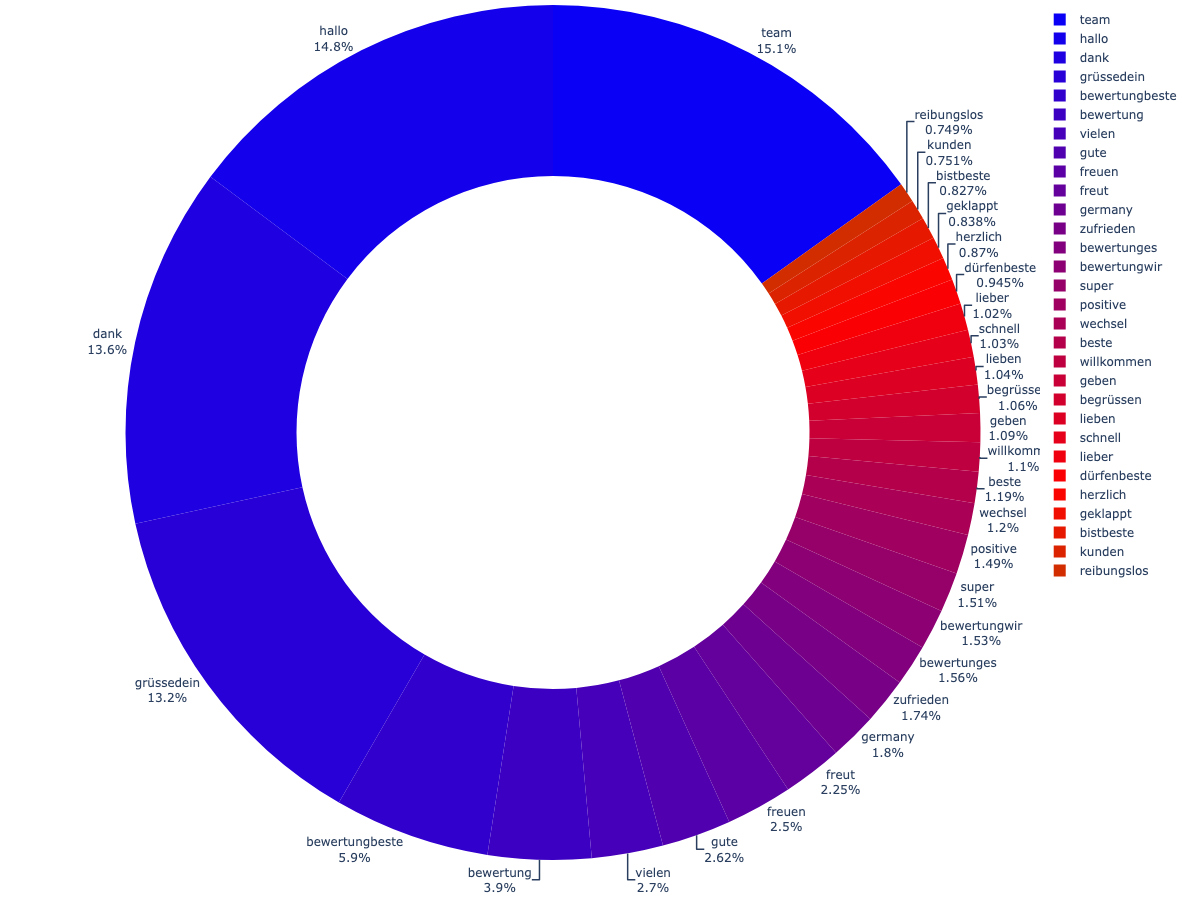

In [220]:
# donut chart
n = 50
pal = list(sns.color_palette(palette='brg', n_colors=n).as_hex())

import plotly.express as px
fig = px.pie(df_answers_octo[0:30], values='count', names='words',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 1200, height = 900,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

Interpretation:

We can see that customers were addressed personally and informally (hallo, grüssedein, begrüßen, herzlich, freuen, freut, positve, super, lieber, dürfenbeste). The thank you (dank) is expressed for the good rating (bewertungsbeste, bewertung,) by the team.